## HR Analytics Project- Understanding the Attrition in HR

### Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics**<br>
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.


**Attrition in HR**<br>
Attrition in human resources refers to the gradual loss of employee’s overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**<br>
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


### Dataset Link

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

The dataset is a combination of numerical and categorical data. We will explore the datatypes during the EDA.

### Exploratory Data Analysis

In [3]:
# Getting dimensions of the dataset
df.shape

(1470, 35)

The dataset contains 1470 rows and 35 columns.

In [4]:
# Getting the column names
df.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

The independent variables are:<br>
'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'<br>

The output or target variable is:<br>
'Attrition'<br>

In [5]:
# Checking datatype of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The dataset has object and int64 datatypes.

In [6]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif df[i].dtype == 'int64':
        num_cols.append(i)

In [7]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

These are the categorical columns.

In [8]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

These are the Numerical columns.

In [9]:
# Checking for null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in tha dataset.

In [10]:
# Checking for duplicate values
df.duplicated().sum()

0

There are also no duplicate rows in the dataset.

In [11]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

This gives an overview of the dataset. From here, we can see that there are no missing values in the dataset. We can also observe the datatypes.<br>

From here we can see 9 columns have object datatype and 26 columns have int64 datatype. The target variable Attrition is categorical.

In [12]:
# Number of unique values for each variable
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

From here we can observe that some columns have only 1 value like EmployeeCount, Over18 and StandardHours. Also, the EmployeeNumber is a nominal variable and does not have any quantifiable value
These columns may be removed before model building.

In [13]:
# Frequency of occurence of each value in Attrition column
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There are more employees with Attrition value No than with Attrition value Yes.

In [14]:
# Frequency of occurence of each value in BusinessTravel column
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

More number of employees Travel Rarely.

In [15]:
# Frequency of occurence of each value in Department column
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Maximum number of employees are working in Research & Development, followed by Sales, and the Human Resources.

In [16]:
# Frequency of occurence of each value in EducationField column
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Most of the employees are educated in Life Sciences or Medical filed.

In [17]:
# Frequency of occurence of each value in Gender column
df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

There are many more Male employees than Female employees.

In [18]:
# Frequency of occurence of each value in JobRole column
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

The maximum number of employees are Sales Executives, followed by Reserach Scientist and Laboratory Technician.

In [19]:
# Frequency of occurence of each value in MaritalStatus column
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Most of the employees are married.

In [20]:
# Frequency of occurence of each value in OverTime column
df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

There are less employees with Overtime than ones without.

#### Dataset description

In [21]:
# Statistical summary of columns (numerical data)
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

Observations from statistical summary:
- Age, DailyRate, DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager have mean values greater than median values. These variables are all skewed to the right.
- Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobSatisfaction, MonthlyRate, StockOptionLevel, TrainingTimesLastYear, and WorkLifeBalance have mean values less than the median. This means that these variables are skewed to the left.

#### Data Visualisation

In [22]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("twilight"))

##### Univariate Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64


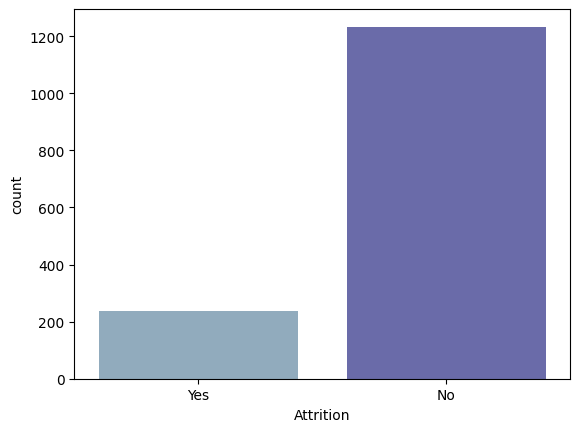

In [23]:
# Visualising the frequency of Attrition in the dataset
print(df.Attrition.value_counts())
sns.countplot(x=df.Attrition)
plt.show()

As observed before, the number of employees with Attrition is a lot lower than the number of employees without attrition.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


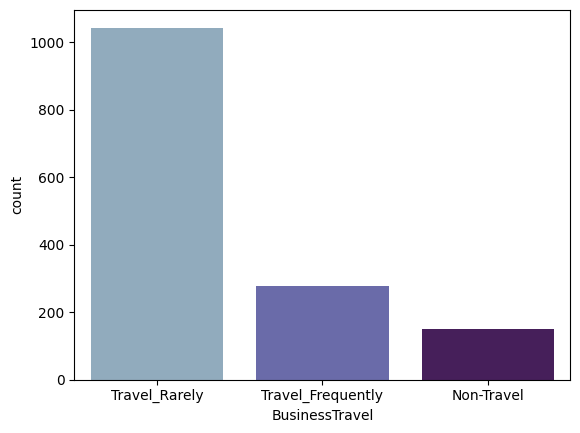

In [24]:
# Visualising the frequency of BusinessTravel in the dataset
print(df.BusinessTravel.value_counts())
sns.countplot(x=df.BusinessTravel)
plt.show()

Maximum employees seem to travel rarely.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


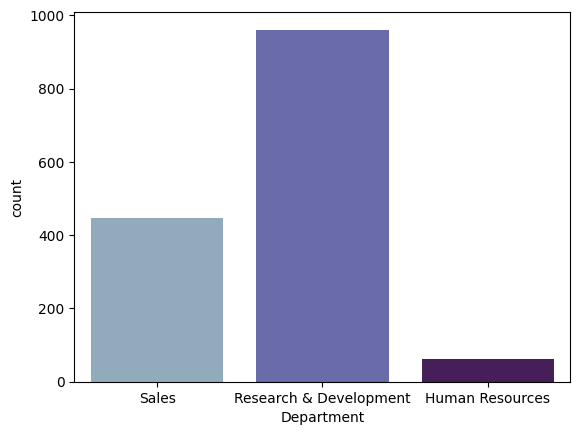

In [25]:
# Visualising the frequency of Department in the dataset
print(df.Department.value_counts())
sns.countplot(x=df.Department)
plt.show()

Most employees work in Research & Development

In [26]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

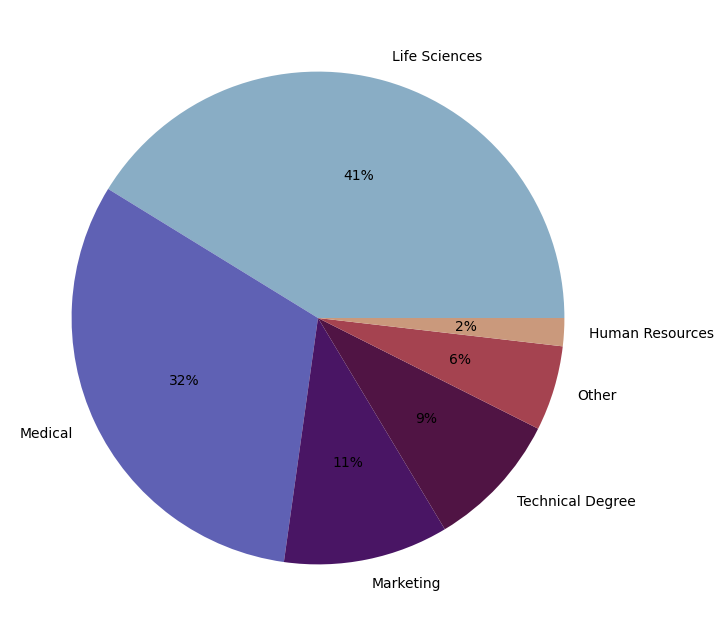

In [27]:
# Visualising the EducationField in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.EducationField.value_counts(), labels=df.EducationField.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

Majority of the employees are educated in Life Sciences or Medical.

Male      882
Female    588
Name: Gender, dtype: int64


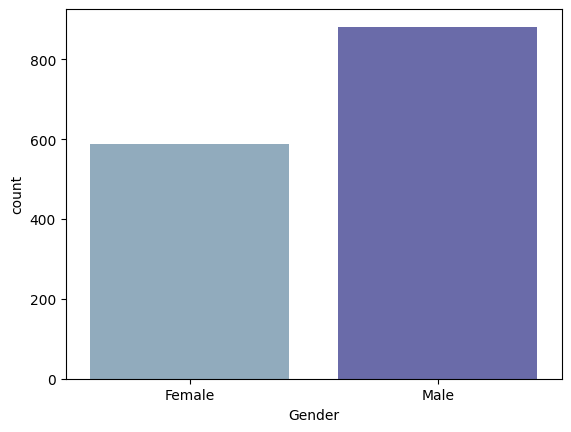

In [28]:
# Visualising the frequency of Gender in the dataset
print(df.Gender.value_counts())
sns.countplot(x=df.Gender)
plt.show()

Less Female are employed than Males.

In [29]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

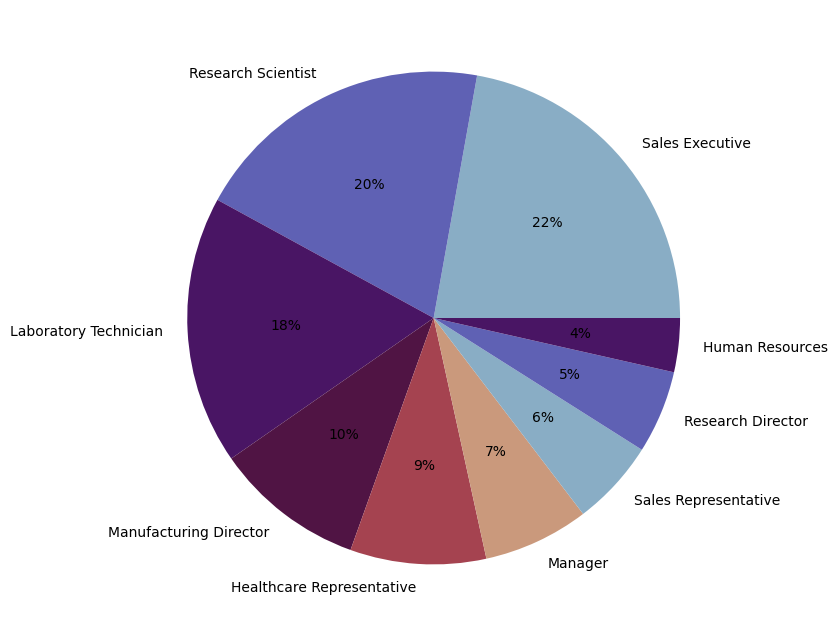

In [30]:
# Visualising the JobRole in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('twilight')
  
plt.pie(df.JobRole.value_counts(), labels=df.JobRole.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

Majority of the employees work as sales Executives. Reserch Scientists or Laboratory Technicians.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


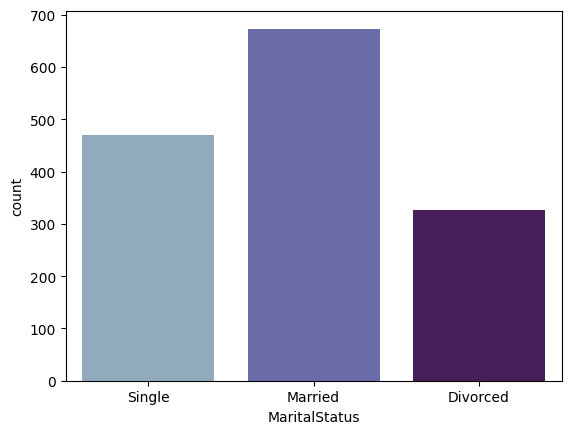

In [31]:
# Visualising the frequency of MaritalStatus in the dataset
print(df.MaritalStatus.value_counts())
sns.countplot(x=df.MaritalStatus)
plt.show()

Majority of the employees are Married.

No     1054
Yes     416
Name: OverTime, dtype: int64


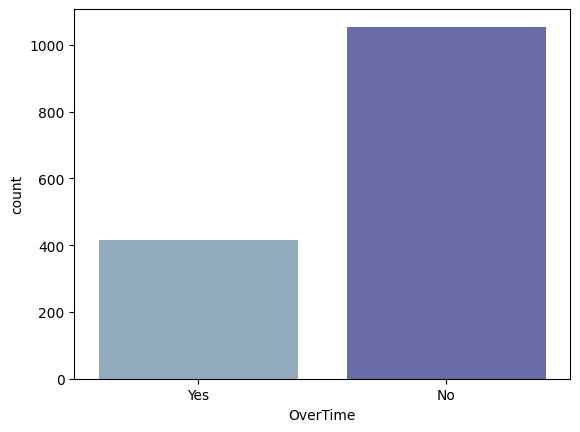

In [32]:
# Visualising the frequency of OverTime in the dataset
print(df.OverTime.value_counts())
sns.countplot(x=df.OverTime)
plt.show()

There are more employees without overtime.

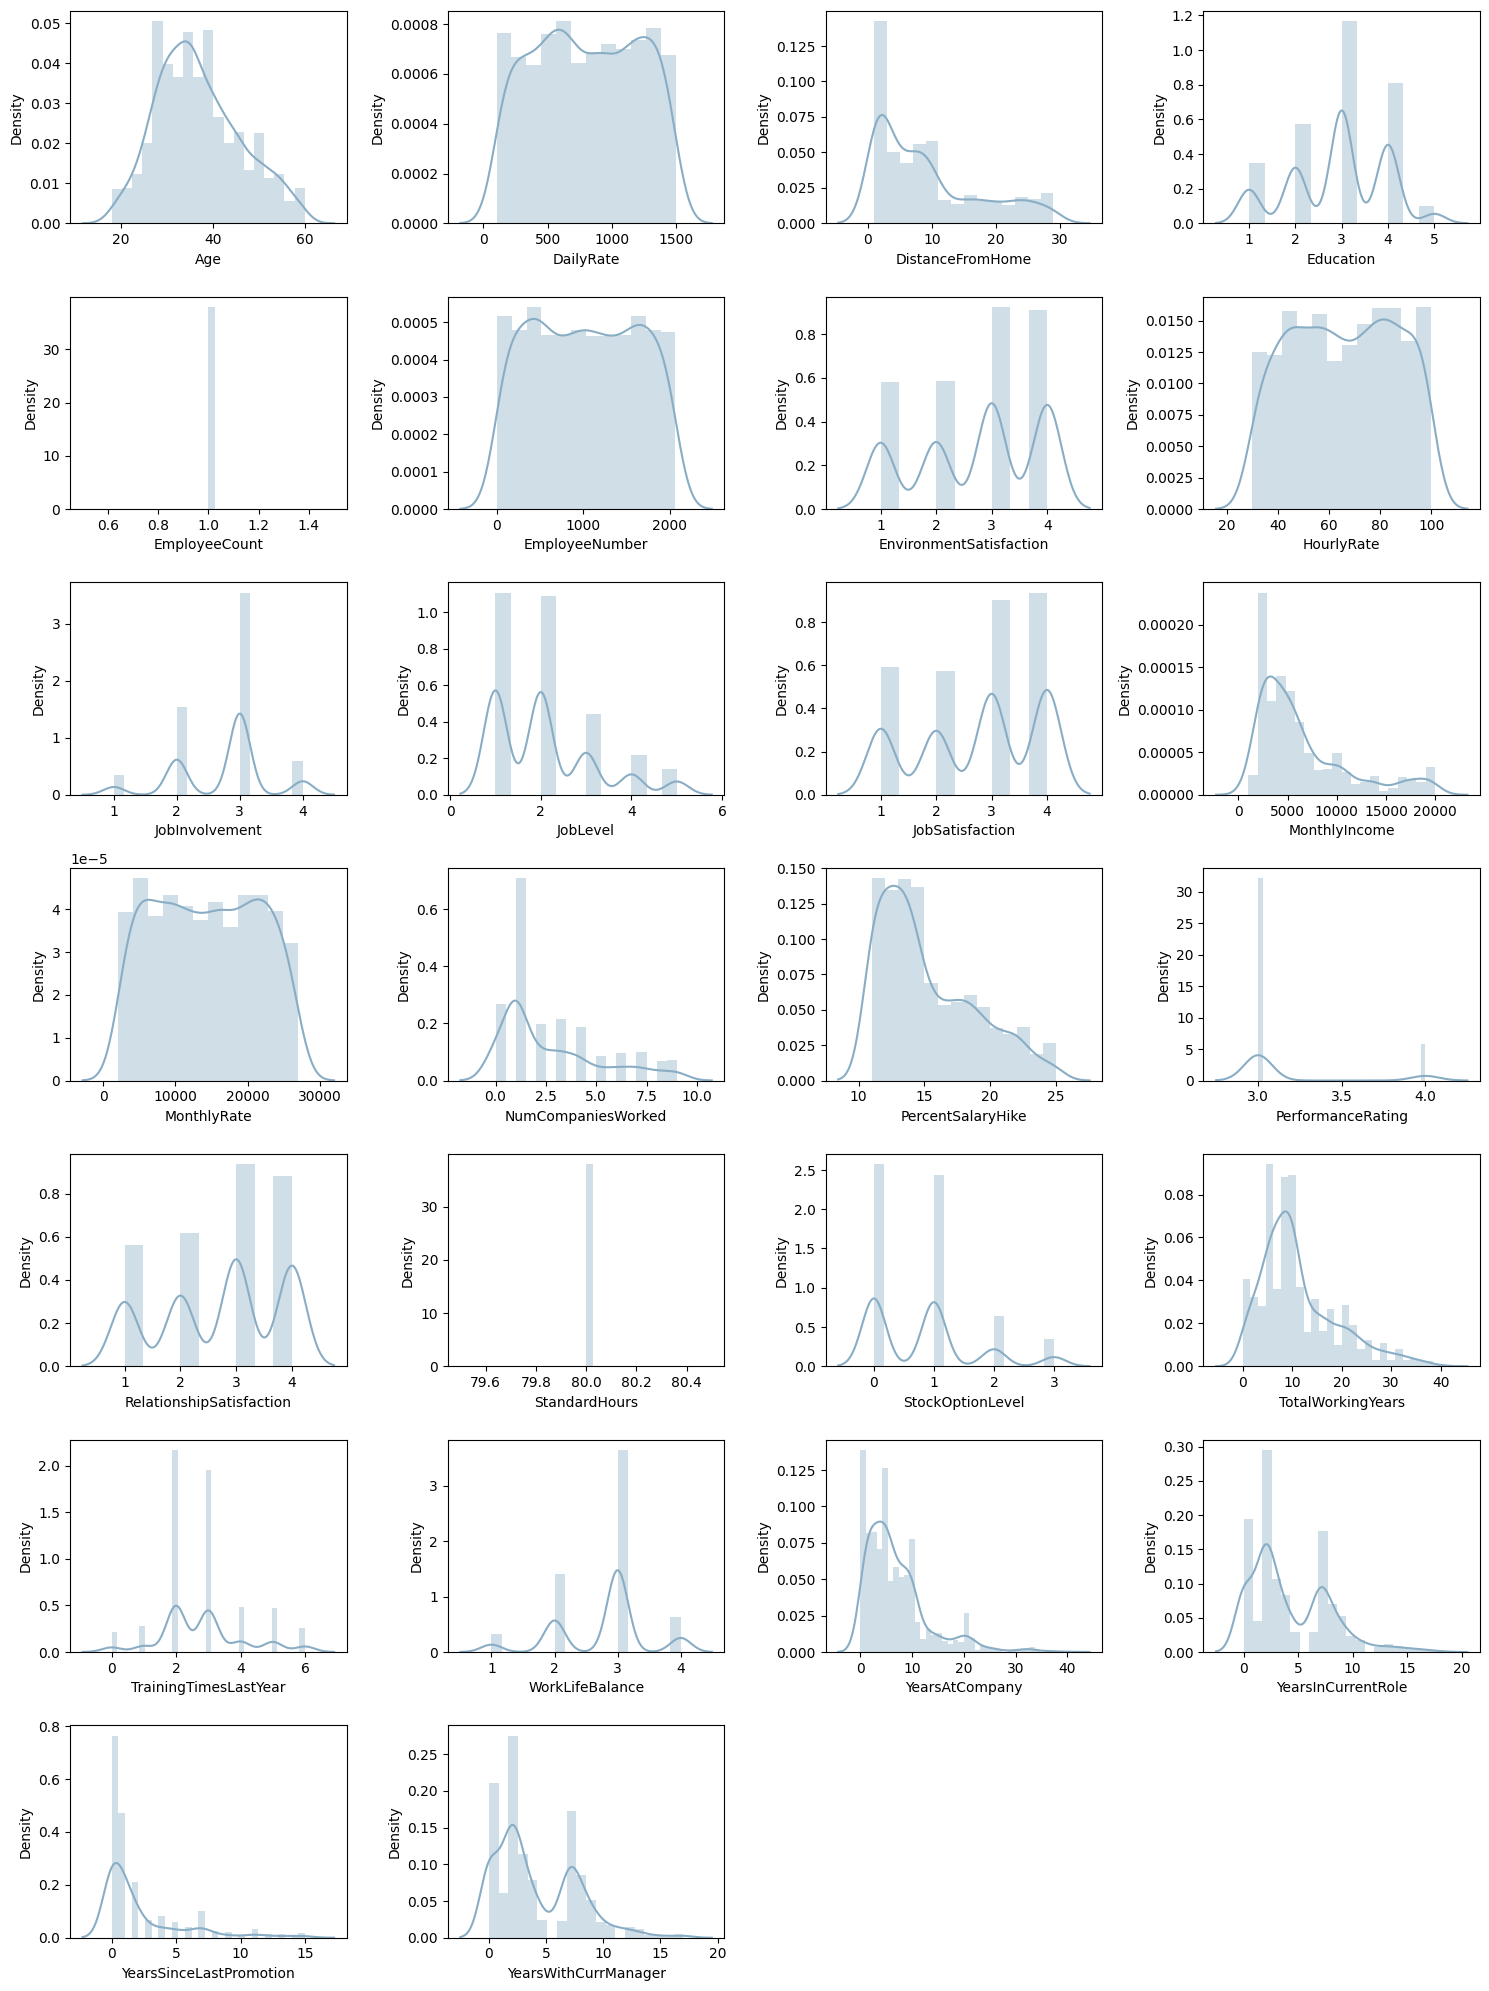

In [33]:
# Data distribution for numerical columns
plt.figure(figsize=(15, 20))
plot_num = 1
for col in num_cols:
    if plot_num <= 26:
        ax = plt.subplot(7, 4, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

-  DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager are all heavily skewed to the right.
- Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobSatisfaction, MonthlyRate, StockOptionLevel, TrainingTimesLastYear, and WorkLifeBalance  are skewed to the left.
- Age and DailyRate, are slightly skewed to the right.

##### Bivariate analysis

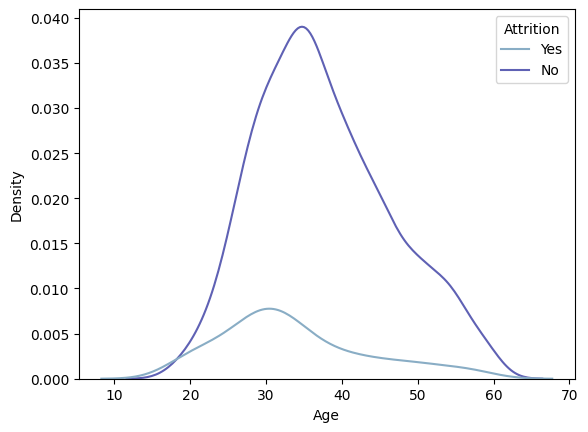

In [34]:
# Age vs Attrition
sns.kdeplot(x="Age", data=df, hue="Attrition")
plt.show()

The attrition rate is higher for employees in their late 20s and early 30s.

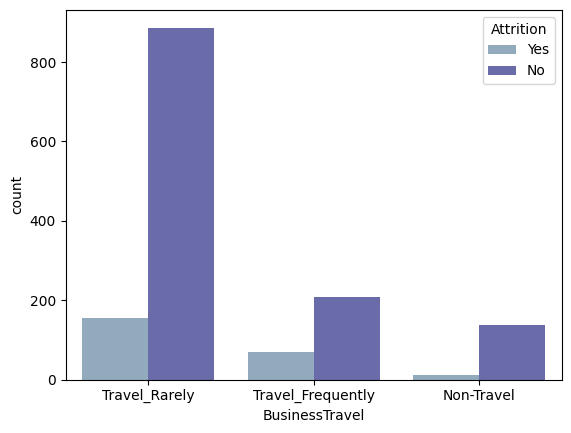

In [35]:
# BusinessTravel vs Attrition
sns.countplot(x="BusinessTravel", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of people who travel rarely seem to have left the company. This might be because there are more number of people who travel rarely in the dataset. We need to explore the percentage of attrition for each of the travel scenarios in this case.

In [36]:
attrition_percent = df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True)
attrition_percent

BusinessTravel     Attrition
Non-Travel         No           0.920000
                   Yes          0.080000
Travel_Frequently  No           0.750903
                   Yes          0.249097
Travel_Rarely      No           0.850431
                   Yes          0.149569
Name: Attrition, dtype: float64

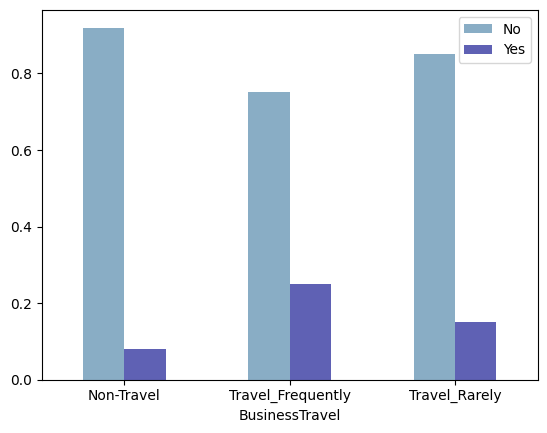

In [37]:
# BusinessTravel vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

Based on the plot, higher percentage of people who travel frequently have left the company.

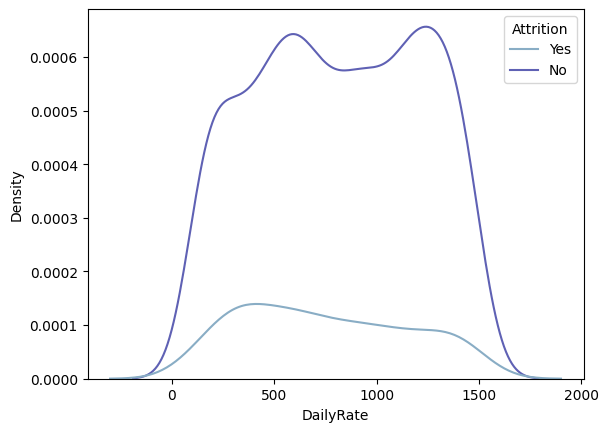

In [38]:
# DailyRate vs Attrition
sns.kdeplot(x="DailyRate", data=df, hue="Attrition")
plt.show()

The mean DailyRate for Attrition class Yes is lower than the mean DailyRate for Attrition class No. This means that employees with higher DailyRate are more likely to stay in the company.

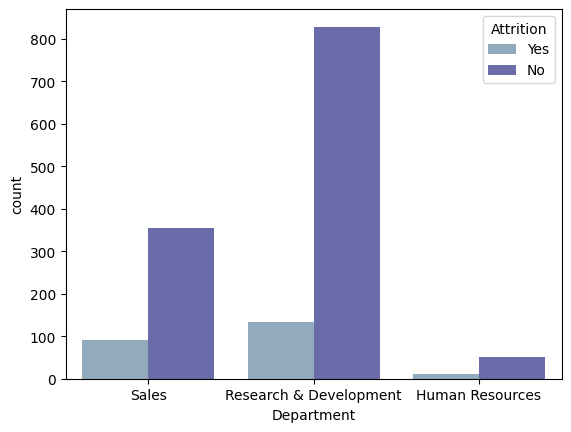

In [39]:
# Department vs Attrition
sns.countplot(x="Department", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

Based on the count, more people in Research & Development department seem to have left the company. But, we need to explore the percentage in this case too, to find out the rate of attrition for each department.

In [40]:
attrition_percent = df.groupby('Department')['Attrition'].value_counts(normalize=True)
attrition_percent

Department              Attrition
Human Resources         No           0.809524
                        Yes          0.190476
Research & Development  No           0.861602
                        Yes          0.138398
Sales                   No           0.793722
                        Yes          0.206278
Name: Attrition, dtype: float64

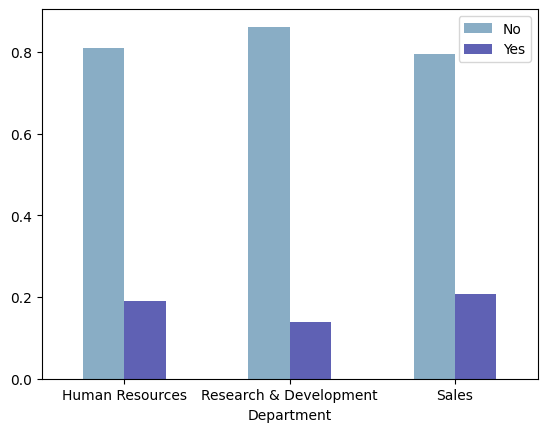

In [41]:
# Department vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The highest attrition rate is in the Sales department.

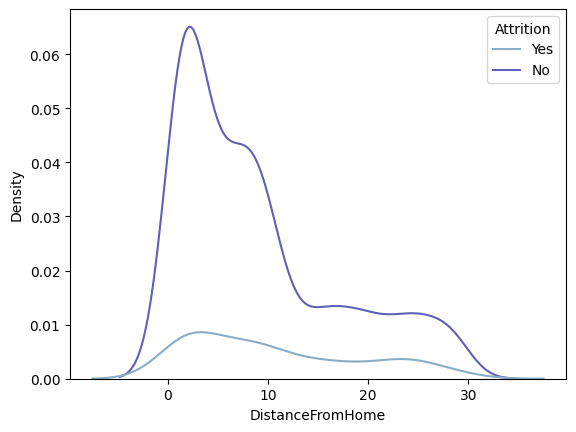

In [42]:
# DistanceFromHome vs Attrition
sns.kdeplot(x="DistanceFromHome", data=df, hue="Attrition")
plt.show()

The DistanceFromHome does not seem to affect the attrition rate significantly.

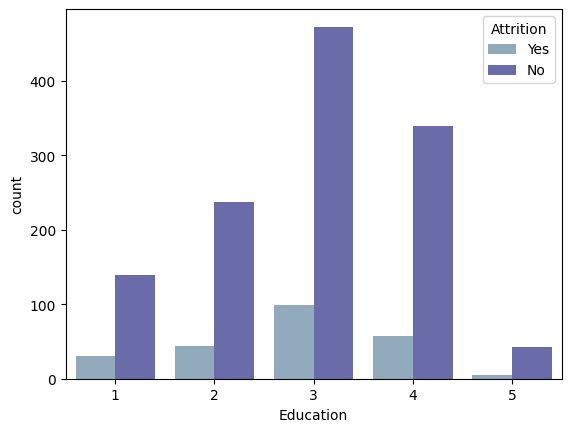

In [43]:
# Education vs Attrition
sns.countplot(x="Education", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with education level 3 seem to have left the company. We need to explore the attrition percentages for each of the Education classes.

In [44]:
attrition_percent = df.groupby('Education')['Attrition'].value_counts(normalize=True)
attrition_percent

Education  Attrition
1          No           0.817647
           Yes          0.182353
2          No           0.843972
           Yes          0.156028
3          No           0.826923
           Yes          0.173077
4          No           0.854271
           Yes          0.145729
5          No           0.895833
           Yes          0.104167
Name: Attrition, dtype: float64

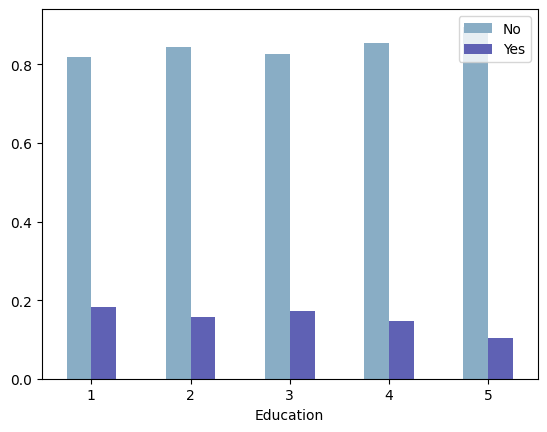

In [45]:
# Education vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

Based on the above plot, we can observe that the attrtion rate is higher for employees with Education level 1.

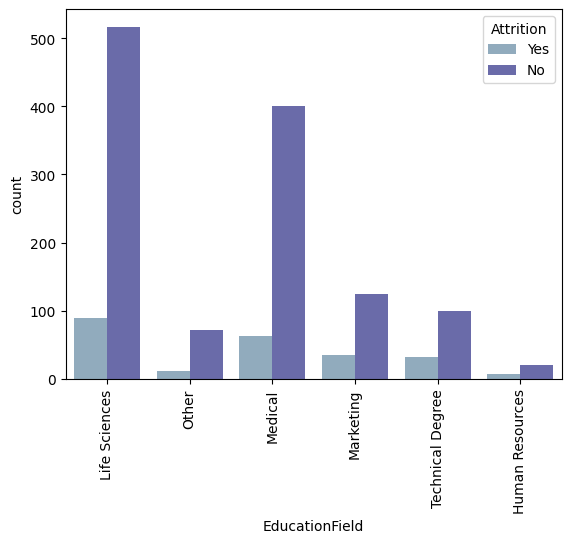

In [46]:
# EducationField vs Attrition
sns.countplot(x="EducationField", data=df, hue="Attrition")
plt.xticks(rotation=90)
plt.show()

More number of employees with Life Sciences education have left the company. We need to explore the attrition percentages for each of the Education Fields.

In [47]:
attrition_percent = df.groupby('EducationField')['Attrition'].value_counts(normalize=True)
attrition_percent

EducationField    Attrition
Human Resources   No           0.740741
                  Yes          0.259259
Life Sciences     No           0.853135
                  Yes          0.146865
Marketing         No           0.779874
                  Yes          0.220126
Medical           No           0.864224
                  Yes          0.135776
Other             No           0.865854
                  Yes          0.134146
Technical Degree  No           0.757576
                  Yes          0.242424
Name: Attrition, dtype: float64

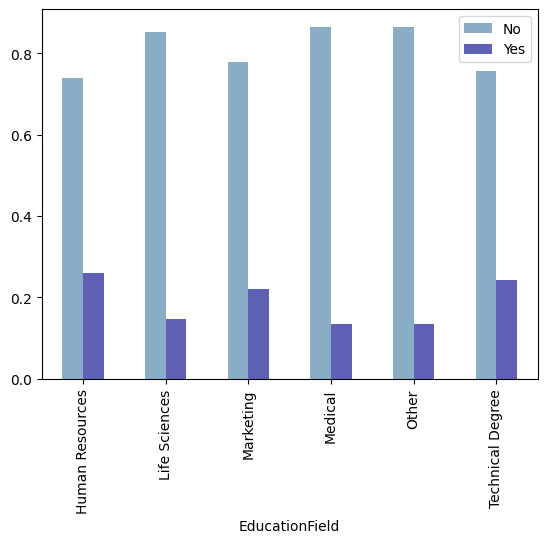

In [48]:
# EducationField vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=90)
plt.show()

Based on the above plot, we can observe that the attrition rate is higher for employees educated in Human Resources, followed by Technical Degree.

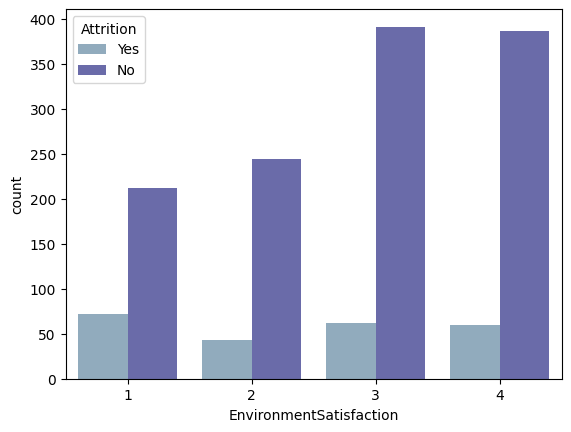

In [49]:
# EnvironmentSatisfaction vs Attrition
sns.countplot(x="EnvironmentSatisfaction", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with EnvironmentSatisfaction 1 seem to have left the company.

In [50]:
attrition_percent = df.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True)
attrition_percent

EnvironmentSatisfaction  Attrition
1                        No           0.746479
                         Yes          0.253521
2                        No           0.850174
                         Yes          0.149826
3                        No           0.863135
                         Yes          0.136865
4                        No           0.865471
                         Yes          0.134529
Name: Attrition, dtype: float64

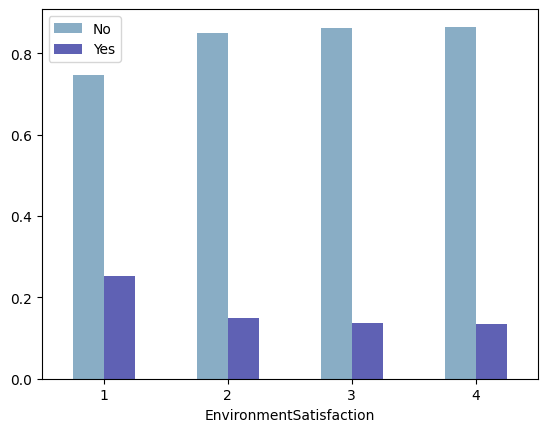

In [51]:
# EnvironmentSatisfaction vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

Based on the above plot, we can observe that the attrition rate is higher for employees with EnvironmentSatisfaction of 1. This is expected as lower satisfaction results in more employees leaving the company.

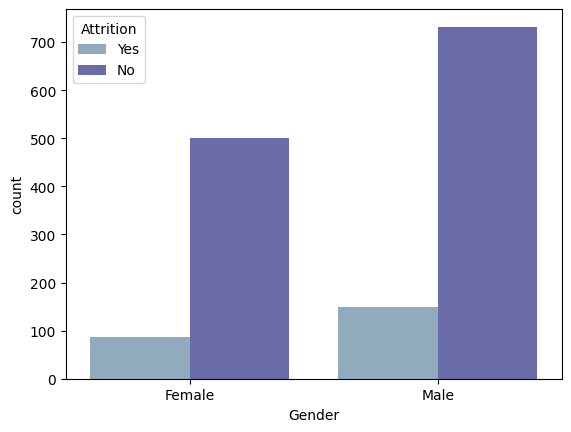

In [52]:
# Gender vs Attrition
sns.countplot(x="Gender", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of Male employees have left the company compared to Female employees.

In [53]:
attrition_percent = df.groupby('Gender')['Attrition'].value_counts(normalize=True)
attrition_percent

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64

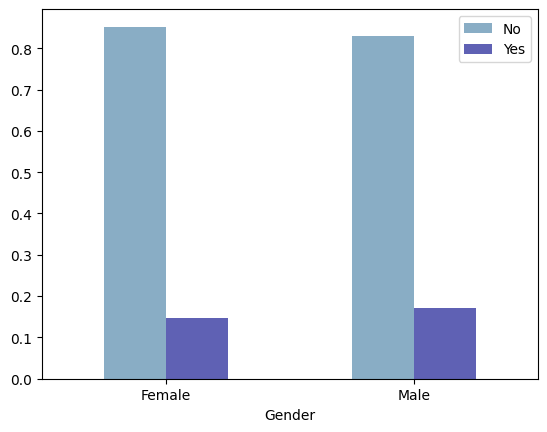

In [54]:
# Gender vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for Male employees is also higher than that for Femalr employees.

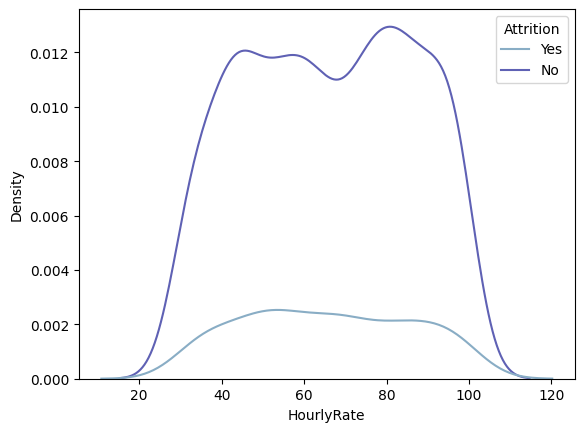

In [55]:
# HourlyRate vs Attrition
sns.kdeplot(x="HourlyRate", data=df, hue="Attrition")
plt.show()

Lower HourlyRate seems to have higher attrition, but the attrition increases again with high HourlyRate (between 90 and 100).

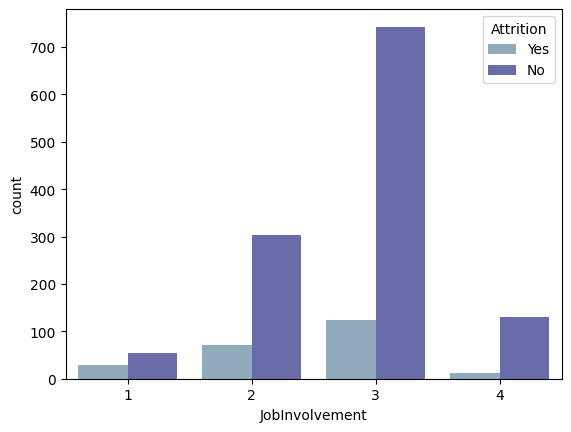

In [56]:
# JobInvolvement vs Attrition
sns.countplot(x="JobInvolvement", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with JobInvolvement of 3 have left the company compared to other values.

In [57]:
attrition_percent = df.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True)
attrition_percent

JobInvolvement  Attrition
1               No           0.662651
                Yes          0.337349
2               No           0.810667
                Yes          0.189333
3               No           0.855991
                Yes          0.144009
4               No           0.909722
                Yes          0.090278
Name: Attrition, dtype: float64

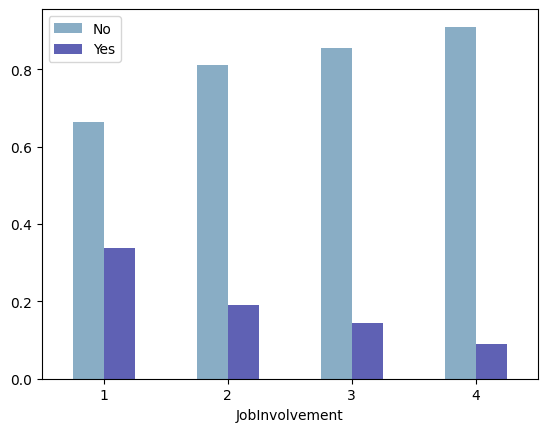

In [58]:
# JobInvolvement vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees seems to be inversely proportional to the level of JobInvolvement.

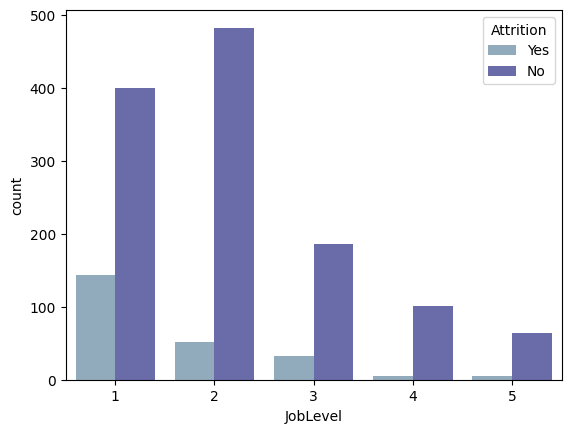

In [59]:
# JobLevel vs Attrition
sns.countplot(x="JobLevel", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with Job Level 1 seems to have left the company.

In [60]:
attrition_percent = df.groupby('JobLevel')['Attrition'].value_counts(normalize=True)
attrition_percent

JobLevel  Attrition
1         No           0.736648
          Yes          0.263352
2         No           0.902622
          Yes          0.097378
3         No           0.853211
          Yes          0.146789
4         No           0.952830
          Yes          0.047170
5         No           0.927536
          Yes          0.072464
Name: Attrition, dtype: float64

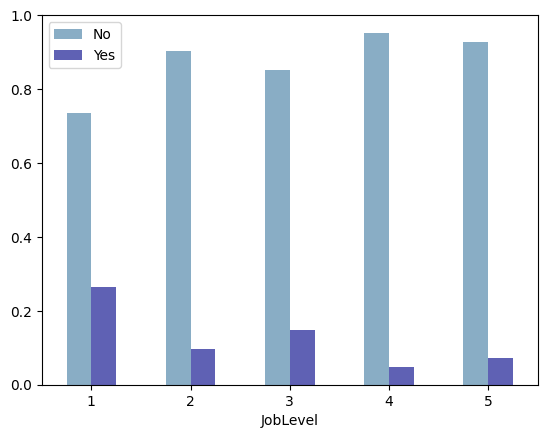

In [61]:
# JobLevel vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees with JobLevel 1 is the highest.

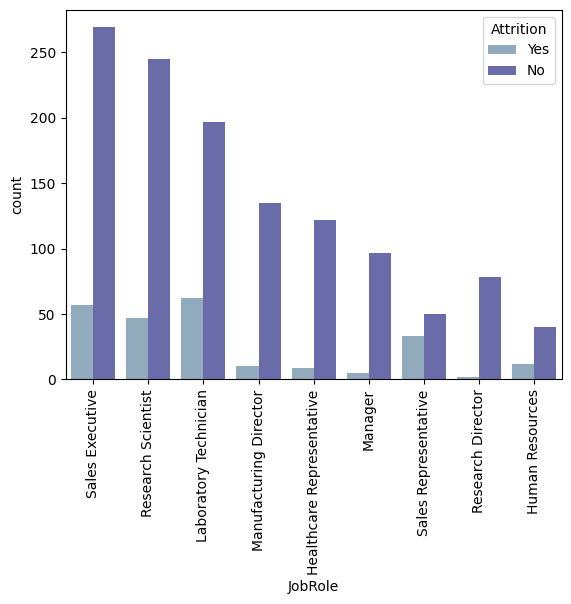

In [62]:
# JobRole vs Attrition
sns.countplot(x="JobRole", data=df, hue="Attrition")
plt.xticks(rotation=90)
plt.show()

More number of Laboratory Technicians have left the company compared to other employees.

In [63]:
attrition_percent = df.groupby('JobRole')['Attrition'].value_counts(normalize=True)
attrition_percent

JobRole                    Attrition
Healthcare Representative  No           0.931298
                           Yes          0.068702
Human Resources            No           0.769231
                           Yes          0.230769
Laboratory Technician      No           0.760618
                           Yes          0.239382
Manager                    No           0.950980
                           Yes          0.049020
Manufacturing Director     No           0.931034
                           Yes          0.068966
Research Director          No           0.975000
                           Yes          0.025000
Research Scientist         No           0.839041
                           Yes          0.160959
Sales Executive            No           0.825153
                           Yes          0.174847
Sales Representative       No           0.602410
                           Yes          0.397590
Name: Attrition, dtype: float64

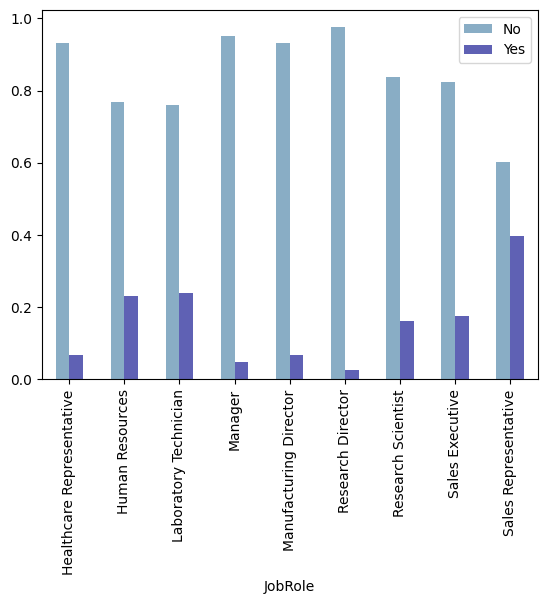

In [64]:
# JobRole vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=90)
plt.show()

The attrition percentage for Sales Representatives is the highest among all job roles.

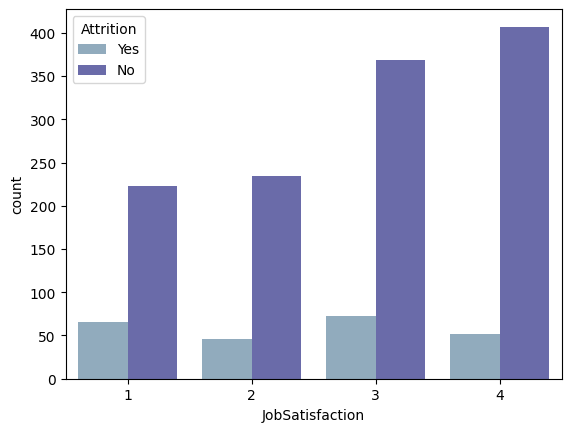

In [65]:
# JobSatisfaction vs Attrition
sns.countplot(x="JobSatisfaction", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with JobSatisfaction 1 and 3 have left the company.

In [66]:
attrition_percent = df.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True)
attrition_percent

JobSatisfaction  Attrition
1                No           0.771626
                 Yes          0.228374
2                No           0.835714
                 Yes          0.164286
3                No           0.834842
                 Yes          0.165158
4                No           0.886710
                 Yes          0.113290
Name: Attrition, dtype: float64

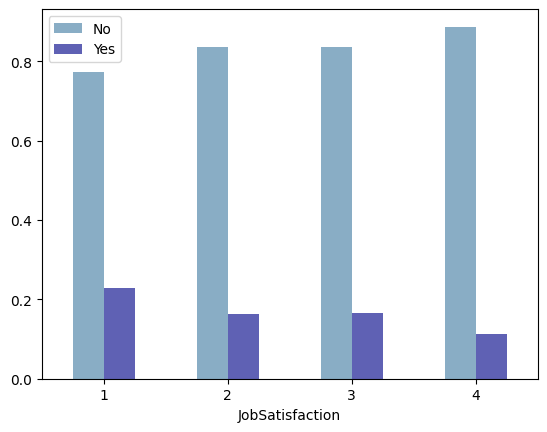

In [67]:
# JobSatisfaction vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage is highest for employees with JobSatisfaction of 1.

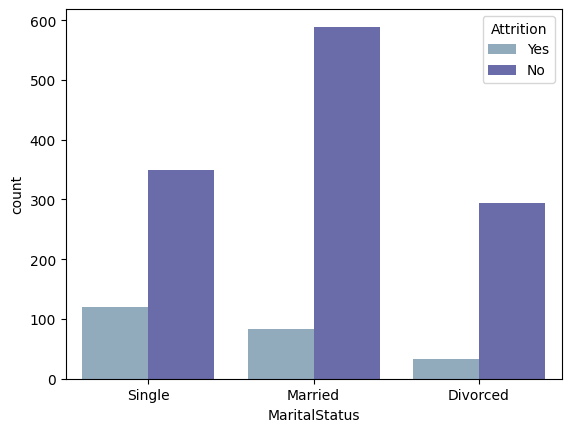

In [68]:
# MaritalStatus vs Attrition
sns.countplot(x="MaritalStatus", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of Single employees have left the company compared to Married or Divorced employees.

In [69]:
attrition_percent = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True)
attrition_percent

MaritalStatus  Attrition
Divorced       No           0.899083
               Yes          0.100917
Married        No           0.875186
               Yes          0.124814
Single         No           0.744681
               Yes          0.255319
Name: Attrition, dtype: float64

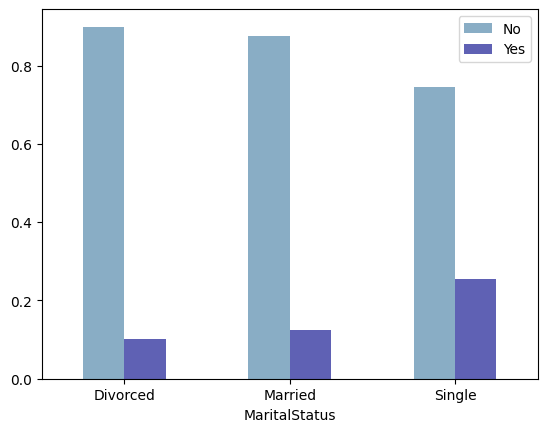

In [70]:
# MaritalStatus vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for Single employees is also higher than that for Married or Divorced employees.

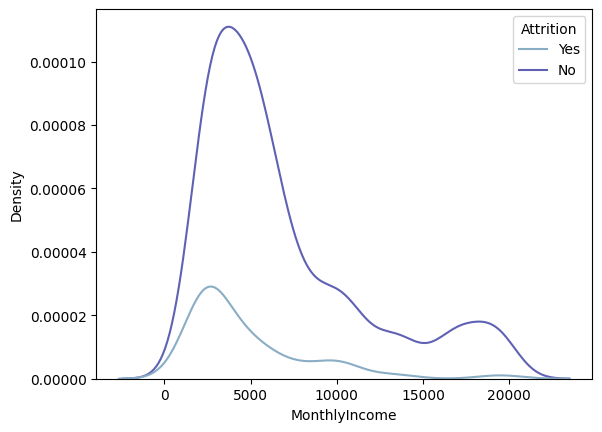

In [71]:
# MonthlyIncome vs Attrition
sns.kdeplot(x="MonthlyIncome", data=df, hue="Attrition")
plt.show()

More employees with lower monthly income (below 5000) have left the company.

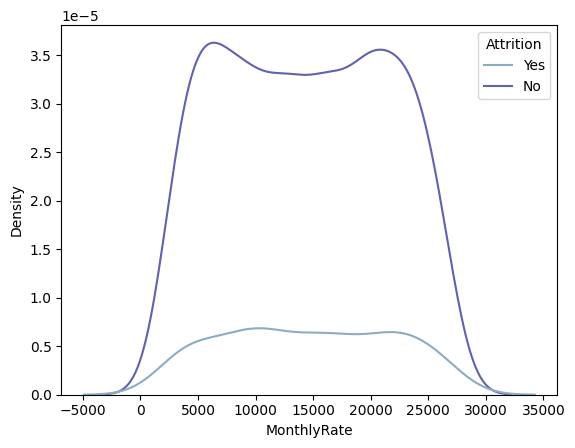

In [72]:
# MonthlyRate vs Attrition
sns.kdeplot(x="MonthlyRate", data=df, hue="Attrition")
plt.show()

Employees with MonthlyRate between 5000 and 25000 have left the company.

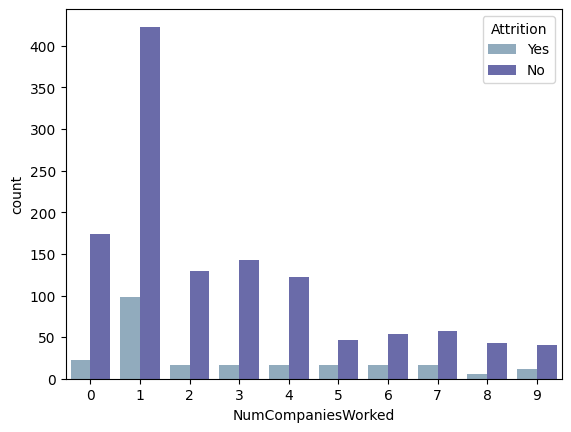

In [73]:
# NumCompaniesWorked vs Attrition
sns.countplot(x="NumCompaniesWorked", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees who have worked in 1 company have left.

In [74]:
attrition_percent = df.groupby('NumCompaniesWorked')['Attrition'].value_counts(normalize=True)
attrition_percent

NumCompaniesWorked  Attrition
0                   No           0.883249
                    Yes          0.116751
1                   No           0.811900
                    Yes          0.188100
2                   No           0.890411
                    Yes          0.109589
3                   No           0.899371
                    Yes          0.100629
4                   No           0.877698
                    Yes          0.122302
5                   No           0.746032
                    Yes          0.253968
6                   No           0.771429
                    Yes          0.228571
7                   No           0.770270
                    Yes          0.229730
8                   No           0.877551
                    Yes          0.122449
9                   No           0.769231
                    Yes          0.230769
Name: Attrition, dtype: float64

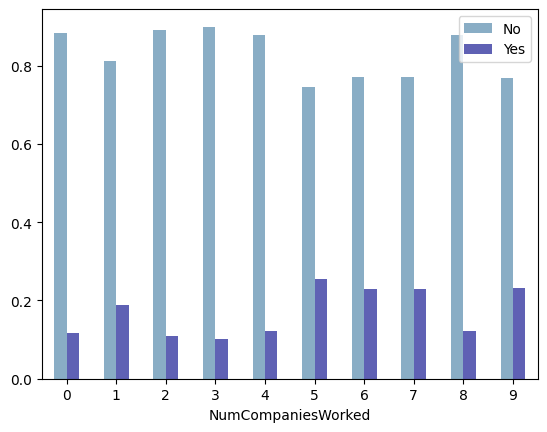

In [75]:
# NumCompaniesWorked vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition rate for employees who have worked in 5 companies is the highest.

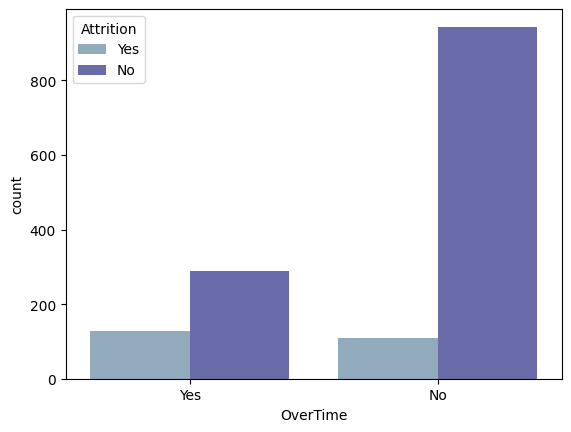

In [76]:
# OverTime vs Attrition
sns.countplot(x="OverTime", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with overtime have left the company compared to employees without overtime.

In [77]:
attrition_percent = df.groupby('OverTime')['Attrition'].value_counts(normalize=True)
attrition_percent

OverTime  Attrition
No        No           0.895636
          Yes          0.104364
Yes       No           0.694712
          Yes          0.305288
Name: Attrition, dtype: float64

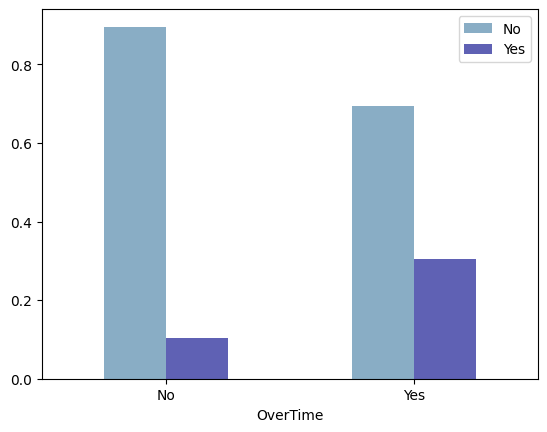

In [78]:
# OverTime vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees with overtime is also higher than that for employees without.

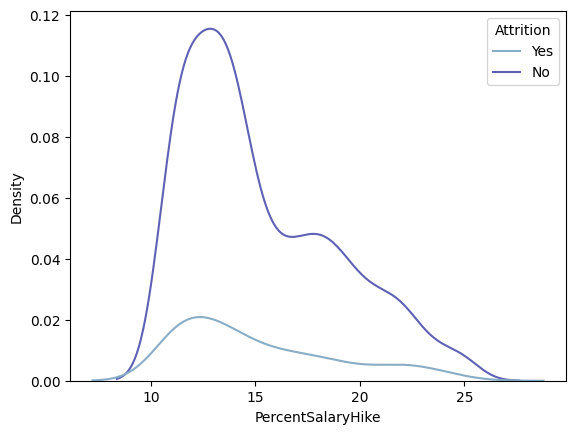

In [79]:
# PercentSalaryHike vs Attrition
sns.kdeplot(x="PercentSalaryHike", data=df, hue="Attrition")
plt.show()

More employees with lower salary hike seem to be leaving the company.

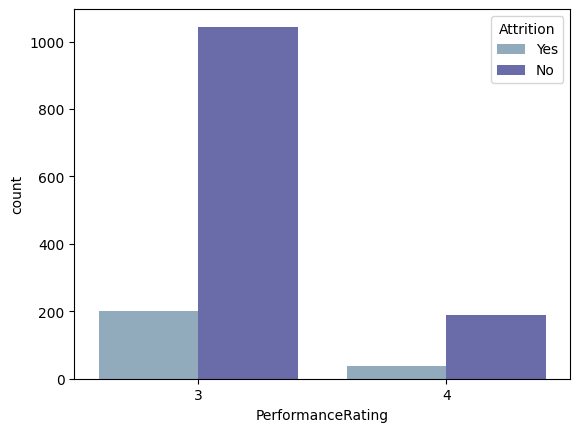

In [80]:
# PerformanceRating vs Attrition
sns.countplot(x="PerformanceRating", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with Performance Rating 3 have left the company.

In [81]:
attrition_percent = df.groupby('PerformanceRating')['Attrition'].value_counts(normalize=True)
attrition_percent

PerformanceRating  Attrition
3                  No           0.839228
                   Yes          0.160772
4                  No           0.836283
                   Yes          0.163717
Name: Attrition, dtype: float64

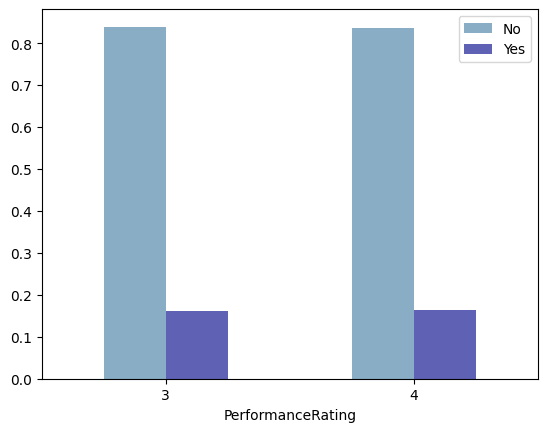

In [82]:
# Gender vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees with performance rating 3 as well as 4 is almost the same.

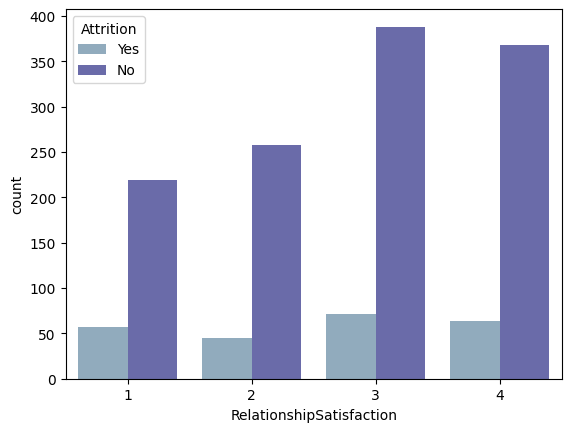

In [83]:
# RelationshipSatisfaction vs Attrition
sns.countplot(x="RelationshipSatisfaction", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More employees with RelationshipSatisfaction have left the company compared to other employees.

In [84]:
attrition_percent = df.groupby('RelationshipSatisfaction')['Attrition'].value_counts(normalize=True)
attrition_percent

RelationshipSatisfaction  Attrition
1                         No           0.793478
                          Yes          0.206522
2                         No           0.851485
                          Yes          0.148515
3                         No           0.845316
                          Yes          0.154684
4                         No           0.851852
                          Yes          0.148148
Name: Attrition, dtype: float64

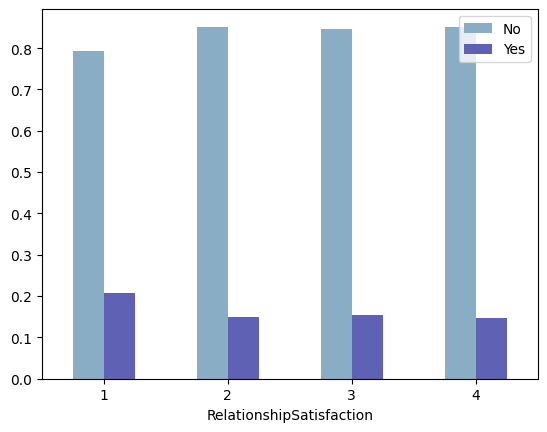

In [85]:
# RelationshipSatisfaction vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage is more or inversely proportional to the RelationshipSatisfaction.

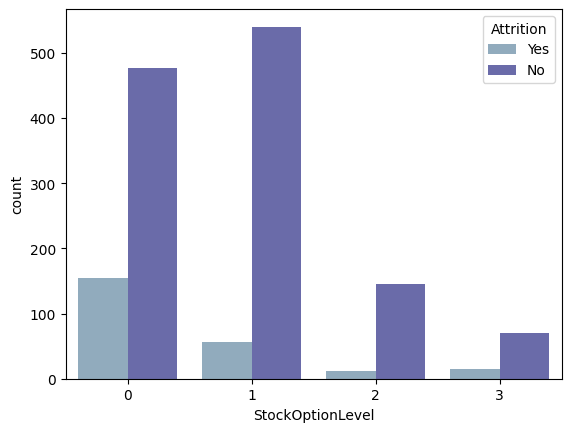

In [86]:
# StockOptionLevel vs Attrition
sns.countplot(x="StockOptionLevel", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with 0 StockOptionLevel have left the company compared to others.

In [87]:
attrition_percent = df.groupby('StockOptionLevel')['Attrition'].value_counts(normalize=True)
attrition_percent

StockOptionLevel  Attrition
0                 No           0.755943
                  Yes          0.244057
1                 No           0.906040
                  Yes          0.093960
2                 No           0.924051
                  Yes          0.075949
3                 No           0.823529
                  Yes          0.176471
Name: Attrition, dtype: float64

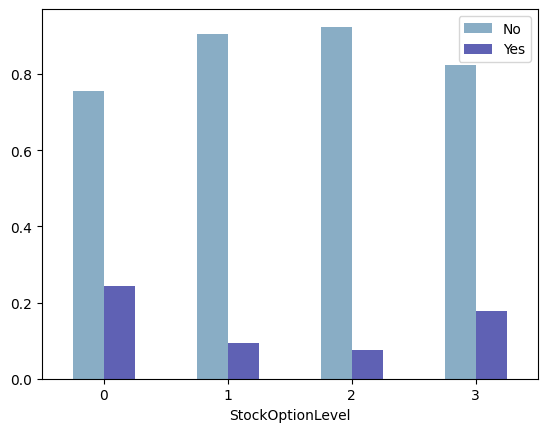

In [88]:
# StockOptionLevel vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees with 0 StockOptionLevel is also higher.

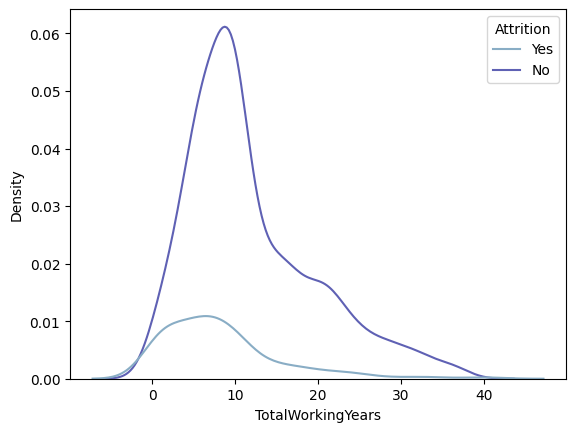

In [89]:
# TotalWorkingYears vs Attrition
sns.kdeplot(x="TotalWorkingYears", data=df, hue="Attrition")
plt.show()

Employees with less number of working years have a higher attrition rate.

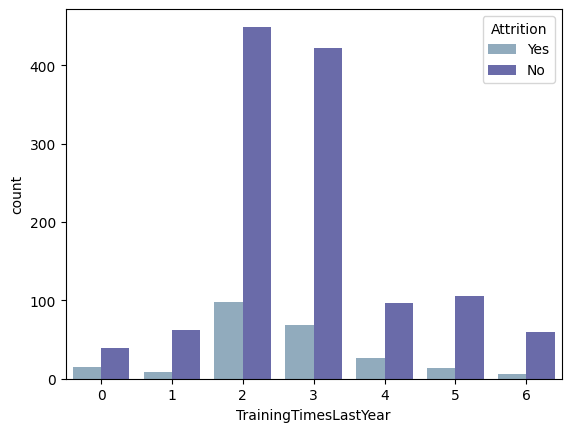

In [90]:
# TrainingTimesLastYear vs Attrition
sns.countplot(x="TrainingTimesLastYear", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with training time of 2 have left the company.

In [91]:
attrition_percent = df.groupby('TrainingTimesLastYear')['Attrition'].value_counts(normalize=True)
attrition_percent

TrainingTimesLastYear  Attrition
0                      No           0.722222
                       Yes          0.277778
1                      No           0.873239
                       Yes          0.126761
2                      No           0.820841
                       Yes          0.179159
3                      No           0.859470
                       Yes          0.140530
4                      No           0.788618
                       Yes          0.211382
5                      No           0.882353
                       Yes          0.117647
6                      No           0.907692
                       Yes          0.092308
Name: Attrition, dtype: float64

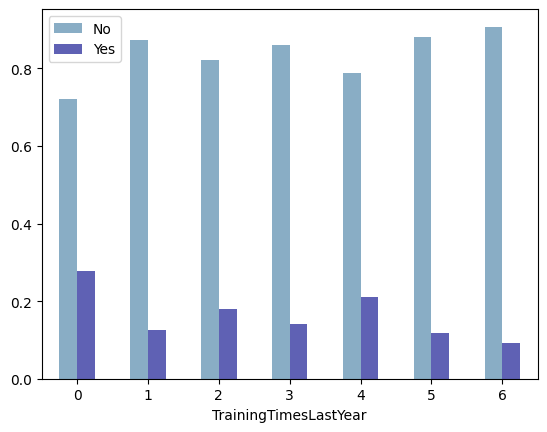

In [92]:
# TrainingTimesLastYear vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees with 0 training times seems to be the highest.

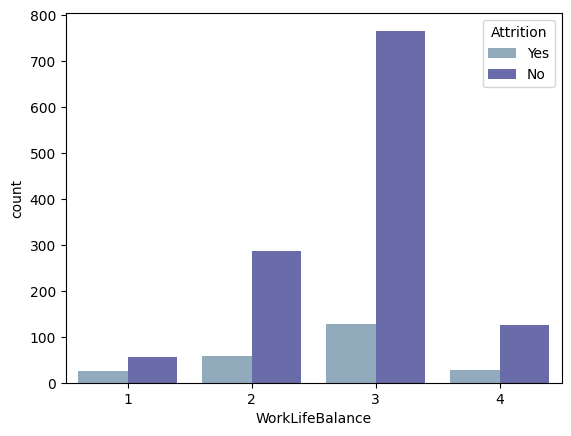

In [93]:
# WorkLifeBalance vs Attrition
sns.countplot(x="WorkLifeBalance", data=df, hue="Attrition")
plt.xticks(rotation=0)
plt.show()

More number of employees with WorkLifeBalance of 3 have left the company compared to others.

In [94]:
attrition_percent = df.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True)
attrition_percent

WorkLifeBalance  Attrition
1                No           0.687500
                 Yes          0.312500
2                No           0.831395
                 Yes          0.168605
3                No           0.857783
                 Yes          0.142217
4                No           0.823529
                 Yes          0.176471
Name: Attrition, dtype: float64

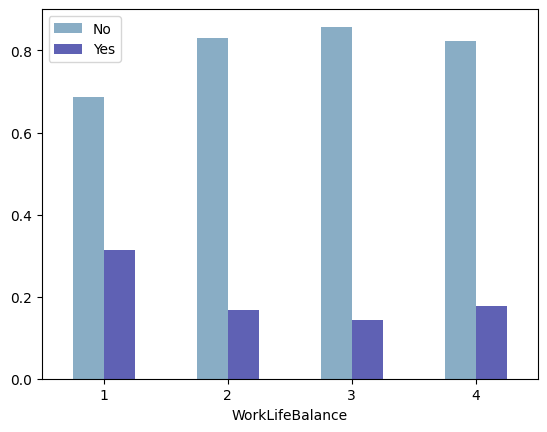

In [95]:
# WorkLifeBalance vs Attrition Percentage
attrition_percent.unstack().plot(kind='bar')
plt.legend(loc = 'best')
plt.xticks(rotation=0)
plt.show()

The attrition percentage for employees with lowest WorkLifeBalance is the highest. However, the attrition rate of employees with highest WorkLifeBalance is not the lowest.

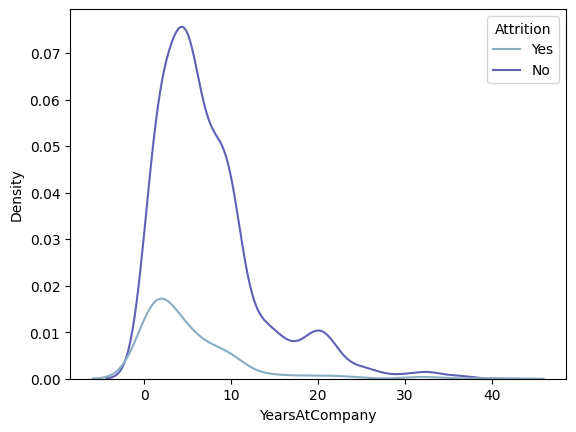

In [96]:
# YearsAtCompany vs Attrition
sns.kdeplot(x="YearsAtCompany", data=df, hue="Attrition")
plt.show()

Employees with less number of years at the company have a higher attrition rate.

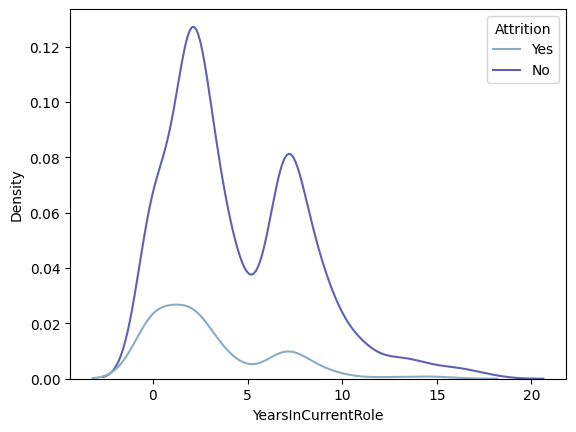

In [97]:
# YearsInCurrentRole vs Attrition
sns.kdeplot(x="YearsInCurrentRole", data=df, hue="Attrition")
plt.show()

Employees with less number of working years in current role as well as with 7-9 years in current role have a higher attrition rate.

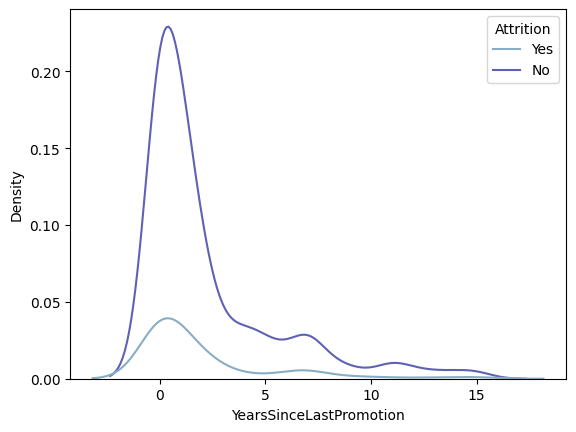

In [98]:
# YearsSinceLastPromotion vs Attrition
sns.kdeplot(x="YearsSinceLastPromotion", data=df, hue="Attrition")
plt.show()

Employees with less number of years since last promotion have a higher attrition rate.

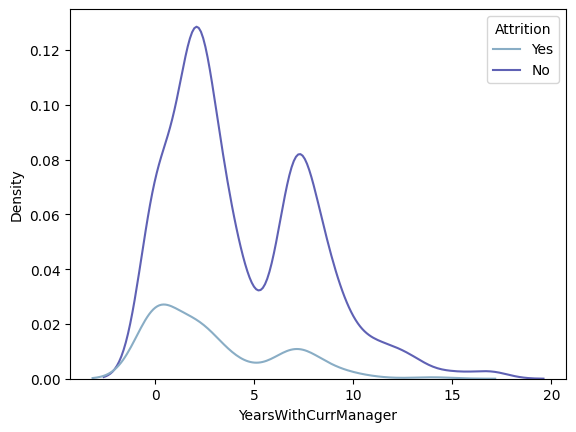

In [99]:
# YearsWithCurrManager vs Attrition
sns.kdeplot(x="YearsWithCurrManager", data=df, hue="Attrition")
plt.show()

Employees with less number of years with current manager (between 1 and 3 ) have a higher attrition rate. Some employees with 7-8 years with current manager also show higher attrition.

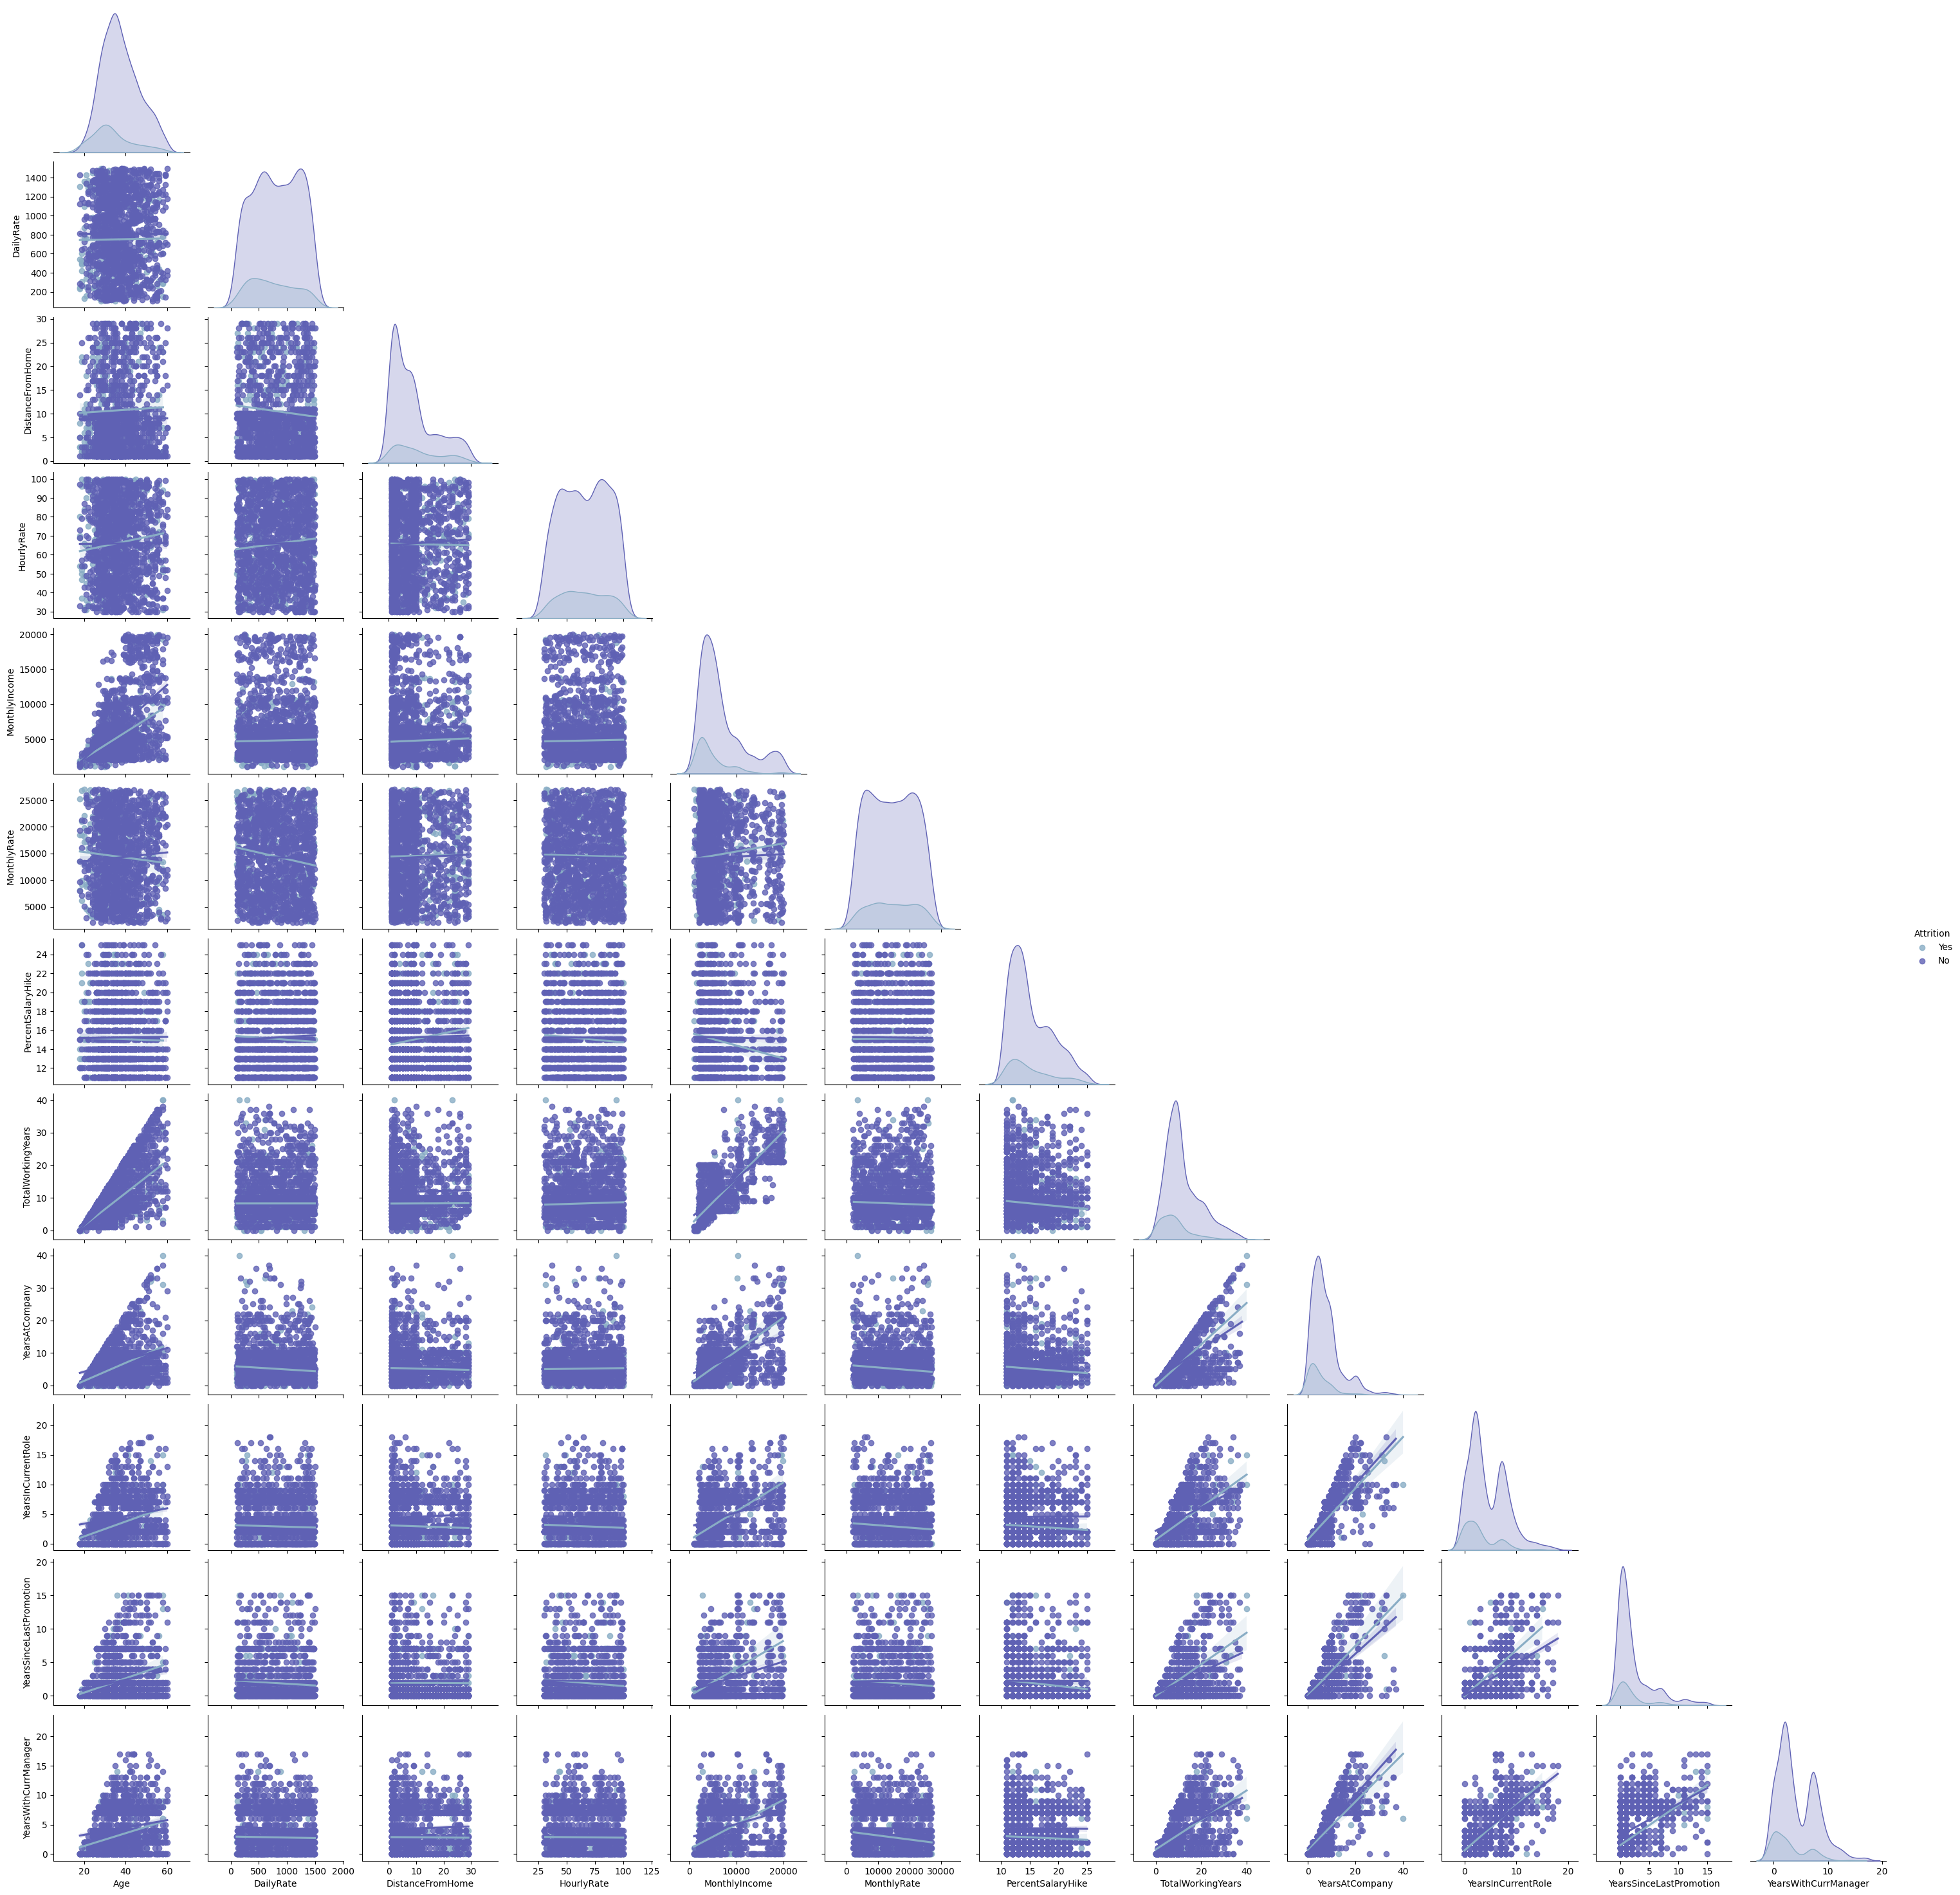

In [100]:
# Pairwise relationship between continuous numerical variables with respect to the Attrition
continuous_cols = ['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
                   'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
sns.pairplot(df[continuous_cols], hue='Attrition', corner = True, kind='reg')
plt.show()

Moderate to strong correlation can be observed between the following variables.
- Age and MonthlyIncome
- Age and TotalWorkingYears
- Age and YearsAtCompany
- MonthlyIncome and TotalWorkingYears
- MonthlyIncome and YearsAtCompany
- TotalWorkingYears and YearsAtCompany
- TotalWorkingYears and YearsInCurrentRole
- TotalWorkingYears and YearsSinceLastPromotion
- TotalWorkingYears and YearsWithCurrManager
- YearsAtCompany and YearsInCurrentRole
- YearsAtCompany and YearsSinceLastPromotion
- YearsAtCompany and YearsWithCurrManager
- YearsInCurrentRole and YearsSinceLastPromotion
- YearsInCurrentRole and YearsWithCurrManager
- YearsSinceLastPromotion and YearsWithCurrManager

### Checking for outliers

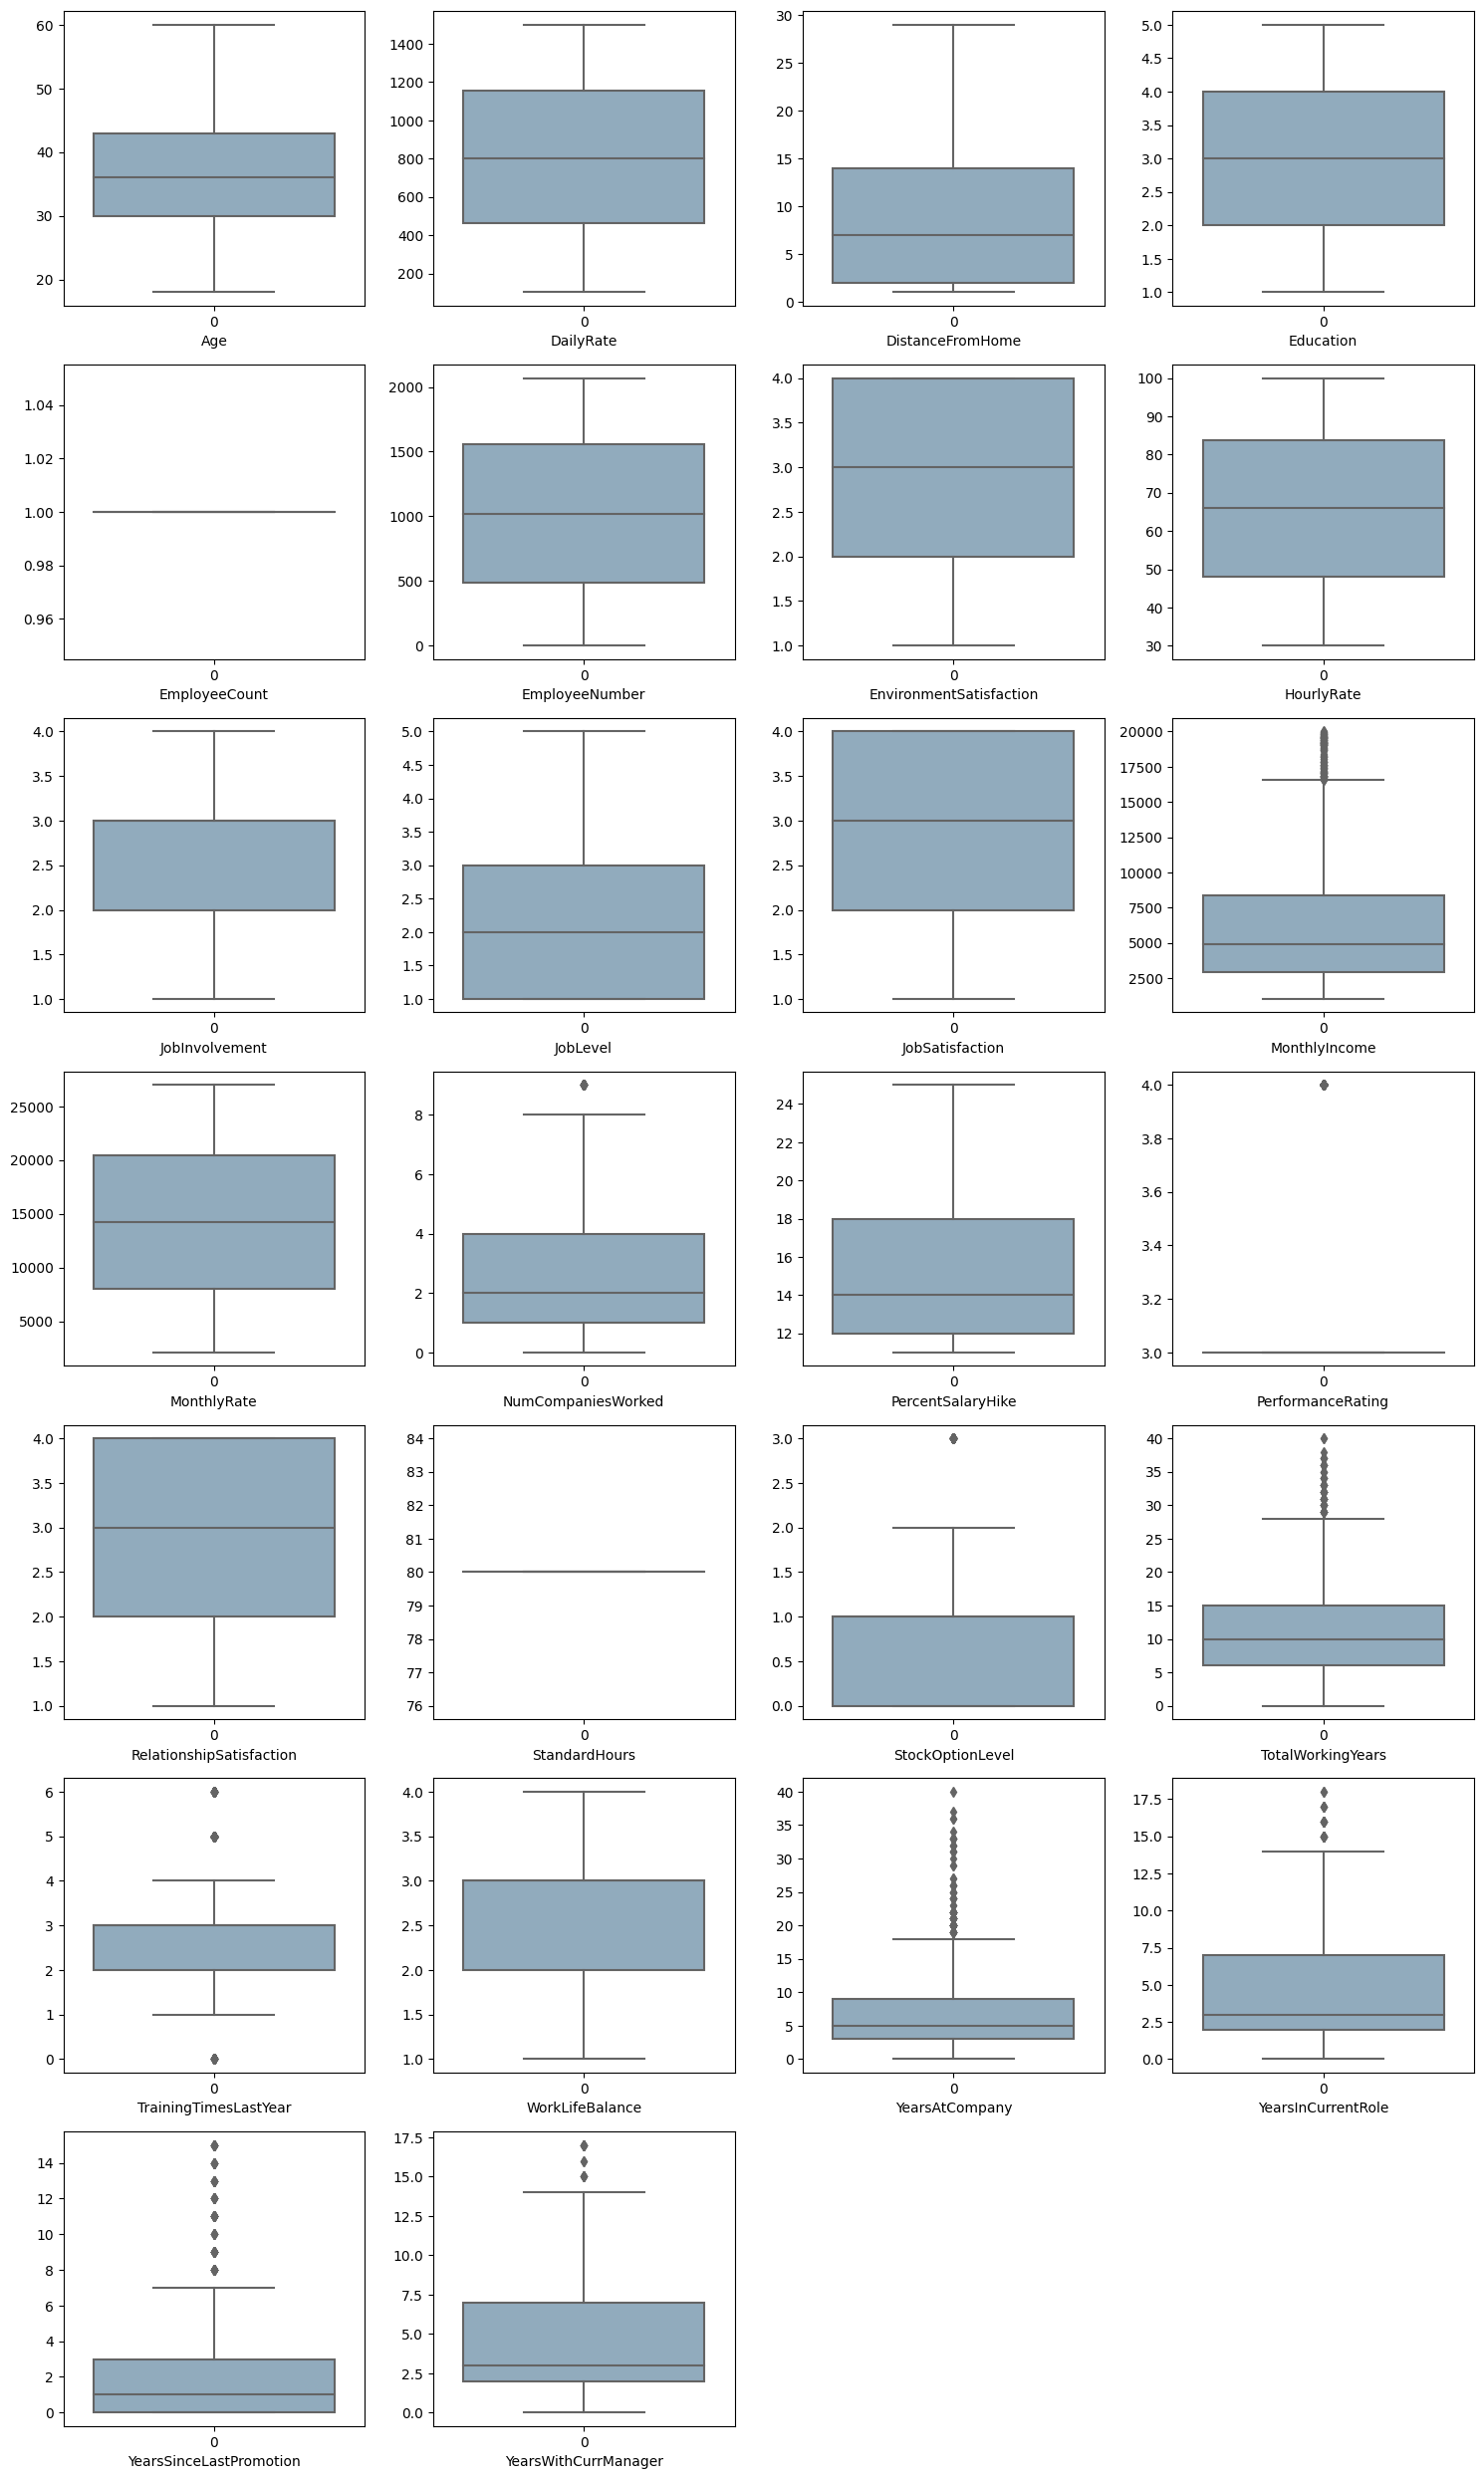

In [101]:
# Checking for outliers using boxplot
plt.figure(figsize=(15, 25))
plot_num = 1
for col in num_cols:
    if plot_num <= 26:
        ax = plt.subplot(7, 4, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Many columns seem to have outliers.
- MonthlyIncome, NumCompaniesWorked, PerformanceRating, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager all seem to have outliers.
- We will use Z-score or IQR method to remove outliers

#### Z-score method

In [102]:
from scipy.stats import zscore

In [103]:
out_features = df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
z = np.abs(zscore(out_features))
z

MonthlyIncome  NumCompaniesWorked  PerformanceRating  TotalWorkingYears  \
0          0.108350            2.125136           0.426230           0.421642   
1          0.291719            0.678049           2.346151           0.164511   
2          0.937654            1.324226           0.426230           0.550208   
3          0.763634            0.678049           0.426230           0.421642   
4          0.644858            2.525591           0.426230           0.678774   
...             ...                 ...                ...                ...   
1465       0.835451            0.523316           0.426230           0.735447   
1466       0.741140            0.523316           0.426230           0.293077   
1467       0.076690            0.678049           2.346151           0.678774   
1468       0.236474            0.277594           0.426230           0.735447   
1469       0.445978            0.277594           0.426230           0.678774   

      TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
0                  2.171982        0.164613            0.063296   
1                  0.155707        0.488508            0.764998   
2                  0.155707        1.144294            1.167687   
3                  0.155707        0.161947            0.764998   
4                  0.155707        0.817734            0.615492   
...                     ...             ...                 ...   
1465               0.155707        0.327893            0.615492   
1466               1.707500        0.001333            0.764998   
1467               2.171982        0.164613            0.615492   
1468               0.155707        0.325228            0.488900   
1469               0.155707        0.491174            0.339394   

      YearsSinceLastPromotion  YearsWithCurrManager  
0                    0.679146              0.245834  
1                    0.368715              0.806541  
2                    0.679146              1.155935  
3                    0.252146              1.155935  
4                    0.058285              0.595227  
...                       ...                   ...  
1465                 0.679146              0.314873  
1466                 0.368715              0.806541  
1467                 0.679146              0.314873  
1468                 0.679146              1.086895  
1469                 0.368715              0.595227  

[1470 rows x 9 columns]

In [104]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(1387, 35)

In [105]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

5.646258503401361

Data loss percentage is around 5.65% for Z-score method.

#### IQR method

In [106]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(830, 35)

In [107]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

43.53741496598639

Data loss percentage is around 43.54%, which is very very high. Normally, we consider data loss of less than 10% only.<br>

So, we will use the z-score method to remove outliers.

In [108]:
df = df_z

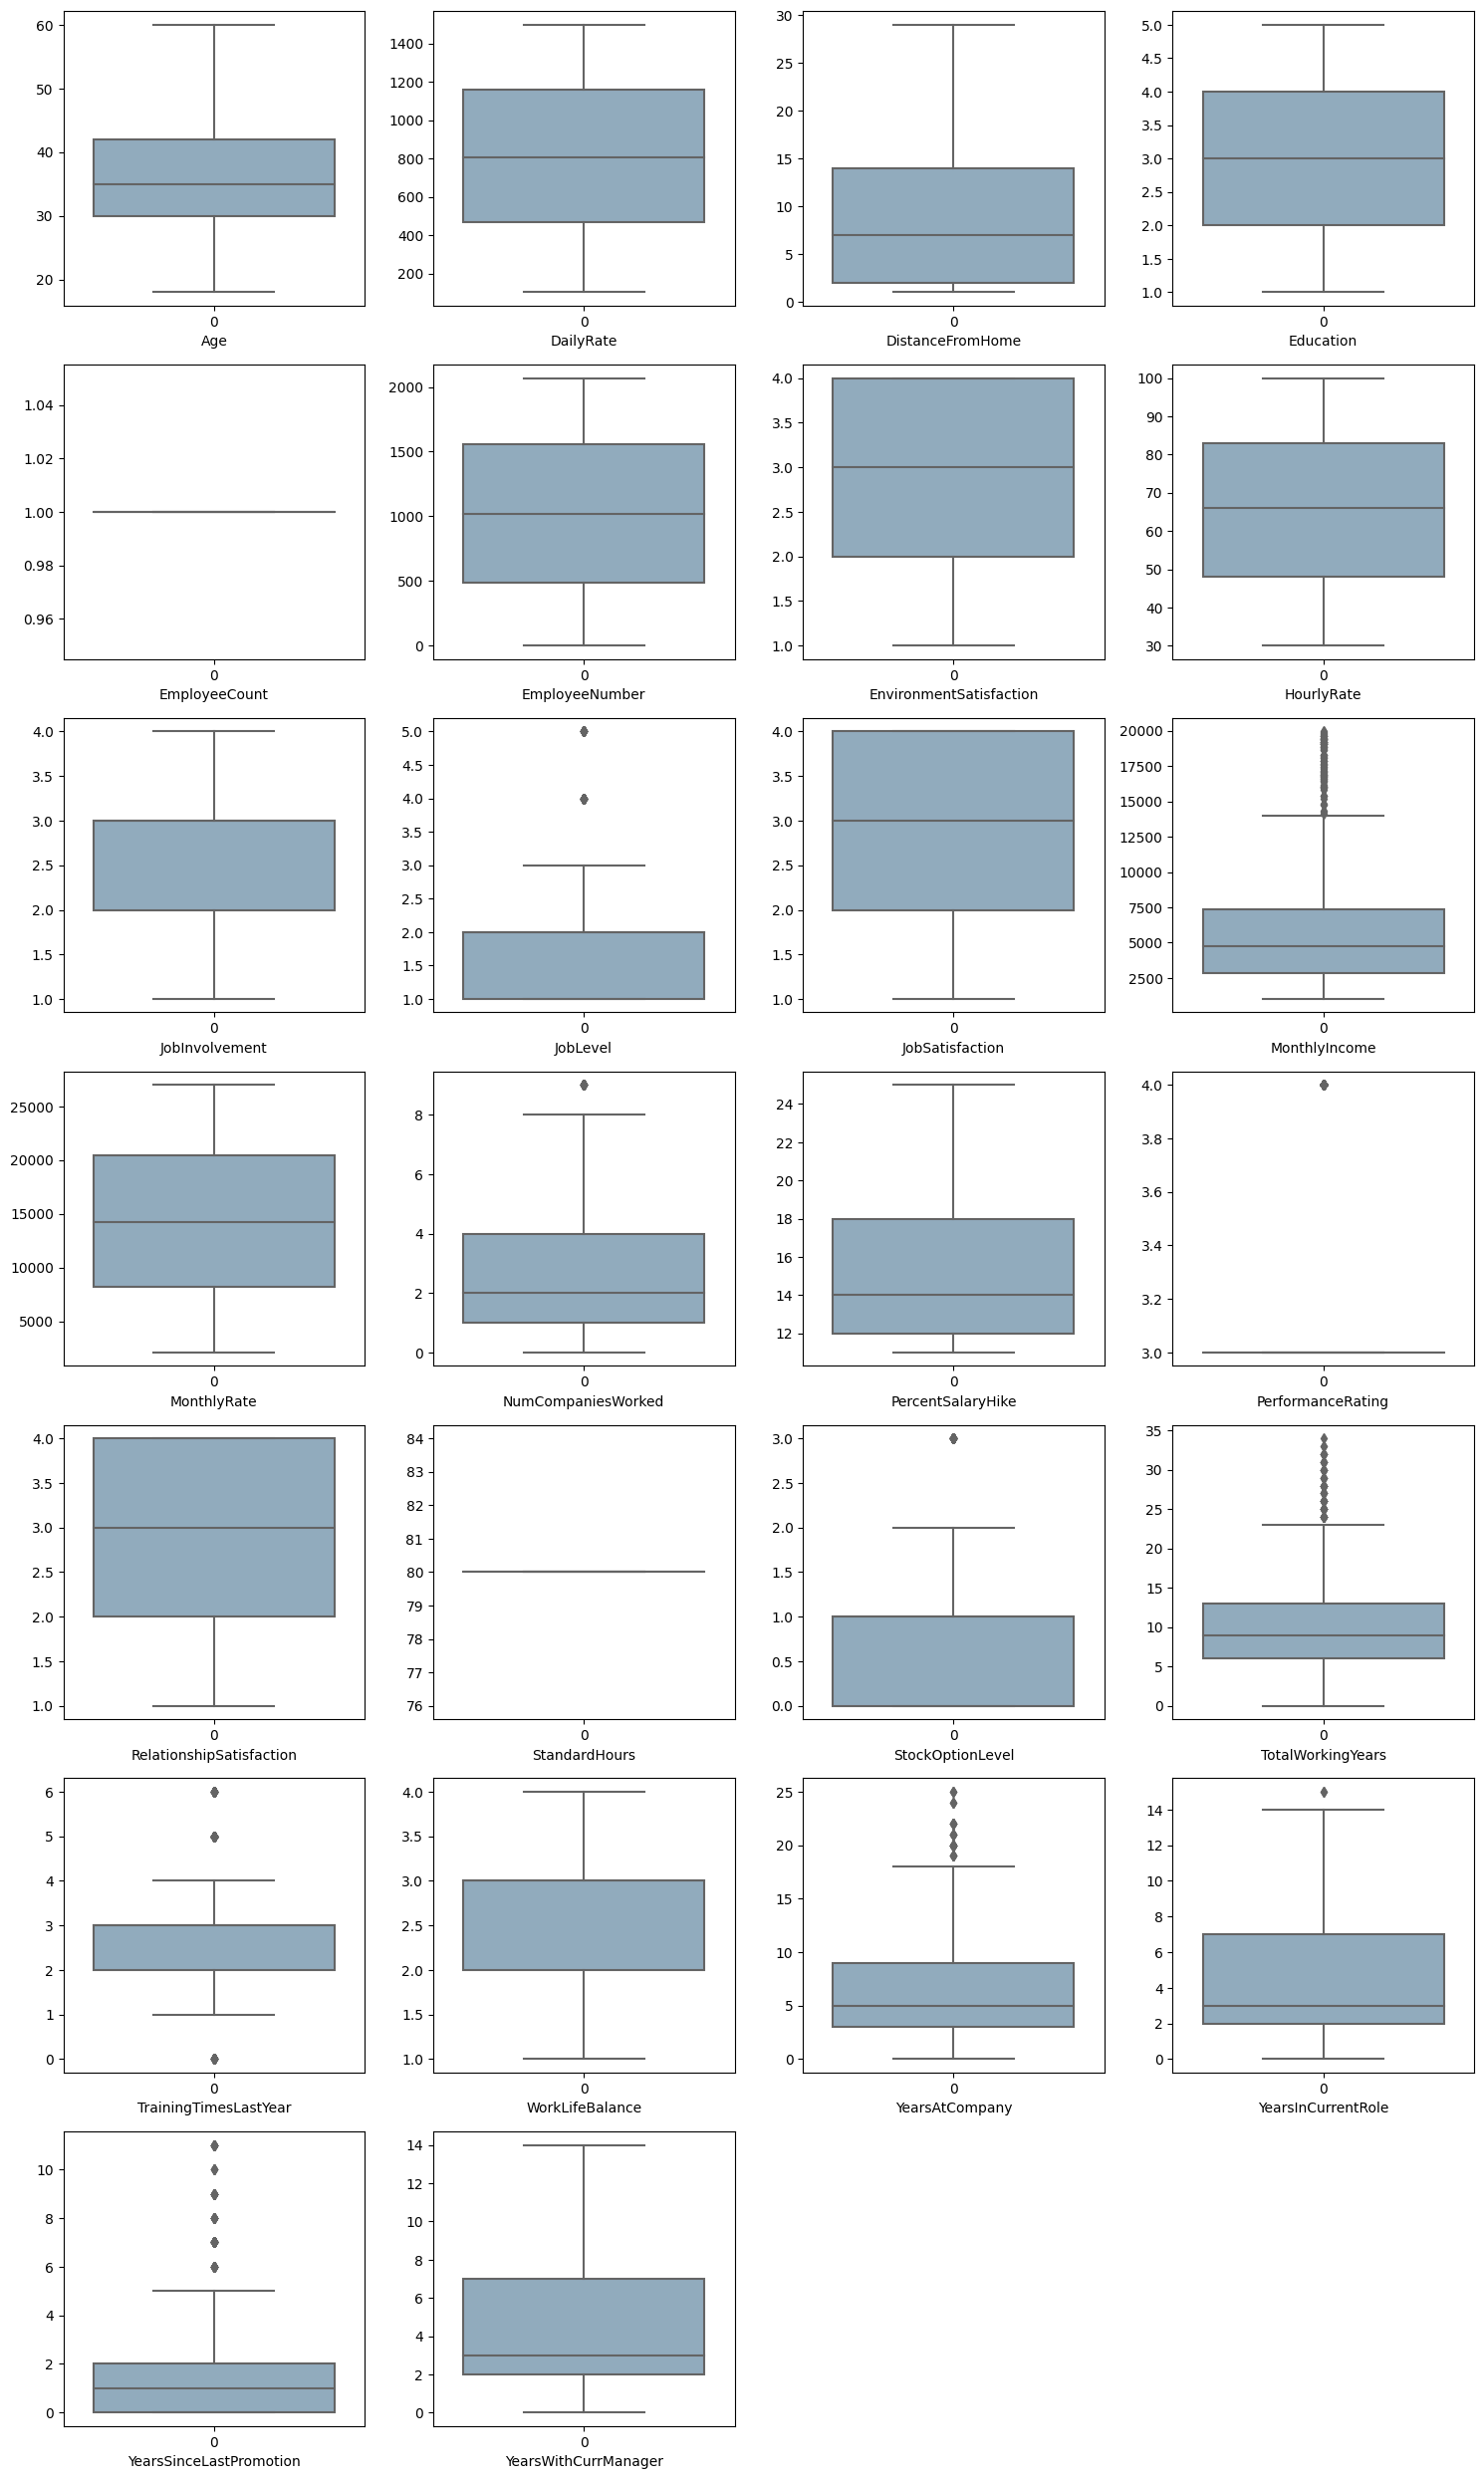

In [109]:
# Checking for outliers again using boxplot
plt.figure(figsize=(15, 25))
plot_num = 1
for col in num_cols:
    if plot_num <= 26:
        ax = plt.subplot(7, 4, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There are fewer outliers in the dataset now.

### Data Preprocessing

In [110]:
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18',], inplace=True)

In [111]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 31 columns]

The unnecessary columns have now been removed from the dataset.

In [112]:
# New categorical and numerical columns

cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif df[i].dtype == 'int64':
        num_cols.append(i)

In [113]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [114]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

### Checking for skewness

In [115]:
continuous_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
                   'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df[continuous_cols].skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
PercentSalaryHike          0.800592
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions)<br>
So the following columns have high skewness:
- DistanceFromHome
- Monthly Income
- PercentSalaryHike
- TotalWorkingYears
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

In [116]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [117]:
# Removing skewness
columns = ['DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [118]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

DistanceFromHome  MonthlyIncome  \
Log Transformation                 -0.247501       0.318248   
Box-Cox Transformation              0.120093       0.510916   
Inverse Transformation              1.305537       1.184932   
Yeo Johnson Transformation         -0.008141       0.027670   
Cube Root Transformation            0.183175       0.742181   
Square Root Transformation          0.393592       0.949220   

                            PercentSalaryHike  TotalWorkingYears  \
Log Transformation                   0.476760                NaN   
Box-Cox Transformation               0.540033          -0.412439   
Inverse Transformation              -0.173245                NaN   
Yeo Johnson Transformation           0.112007          -0.009656   
Cube Root Transformation             0.582291          -0.562790   
Square Root Transformation           0.635856           0.042299   

                            YearsAtCompany  YearsInCurrentRole  \
Log Transformation                     NaN                 NaN   
Box-Cox Transformation           -0.136773           -0.212820   
Inverse Transformation                 NaN                 NaN   
Yeo Johnson Transformation       -0.025203           -0.069556   
Cube Root Transformation         -0.699294           -0.883980   
Square Root Transformation        0.075198           -0.318194   

                            YearsSinceLastPromotion  YearsWithCurrManager  
Log Transformation                              NaN                   NaN  
Box-Cox Transformation                     0.841048             -0.180946  
Inverse Transformation                          NaN                   NaN  
Yeo Johnson Transformation                 0.212071             -0.070493  
Cube Root Transformation                   0.157631             -0.819027  
Square Root Transformation                 0.628992             -0.287221

The Yeo Johnson transformation is the most suitable one for bringing the values in acceptable range of -0.5 to 0.5.

In [119]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [120]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0          0.698793          2  Life Sciences                        2   
1          2.254628          1  Life Sciences                        3   
2          1.112840          2          Other                        4   
3          1.409000          4  Life Sciences                        4   
4          1.112840          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   
2    Male  ...                  3                         2                 0   
3  Female  ...                  3                         3                 0   
4    Male  ...                  3                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0          3.331995                      0               1        2.427596   
1          3.786692                      3               3        3.155981   
2          3.079851                      3               3        0.000000   
3          3.331995                      3               3        2.823661   
4          2.806491                      3               3        1.242409   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0            2.018485                -0.000000             2.260281  
1            2.794574                 0.566648             2.727090  
2            0.000000                -0.000000             0.000000  
3            2.794574                 0.939888             0.000000  
4            1.280069                 0.803607             1.264277  

[5 rows x 31 columns]

These are the transformed values.

In [121]:
continuous_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
                   'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df[continuous_cols].skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome          -0.008149
HourlyRate                -0.030481
MonthlyIncome              0.027700
MonthlyRate                0.030596
PercentSalaryHike          0.112128
TotalWorkingYears         -0.009666
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

Now the skewness values with continuous numerical data are within range as well.

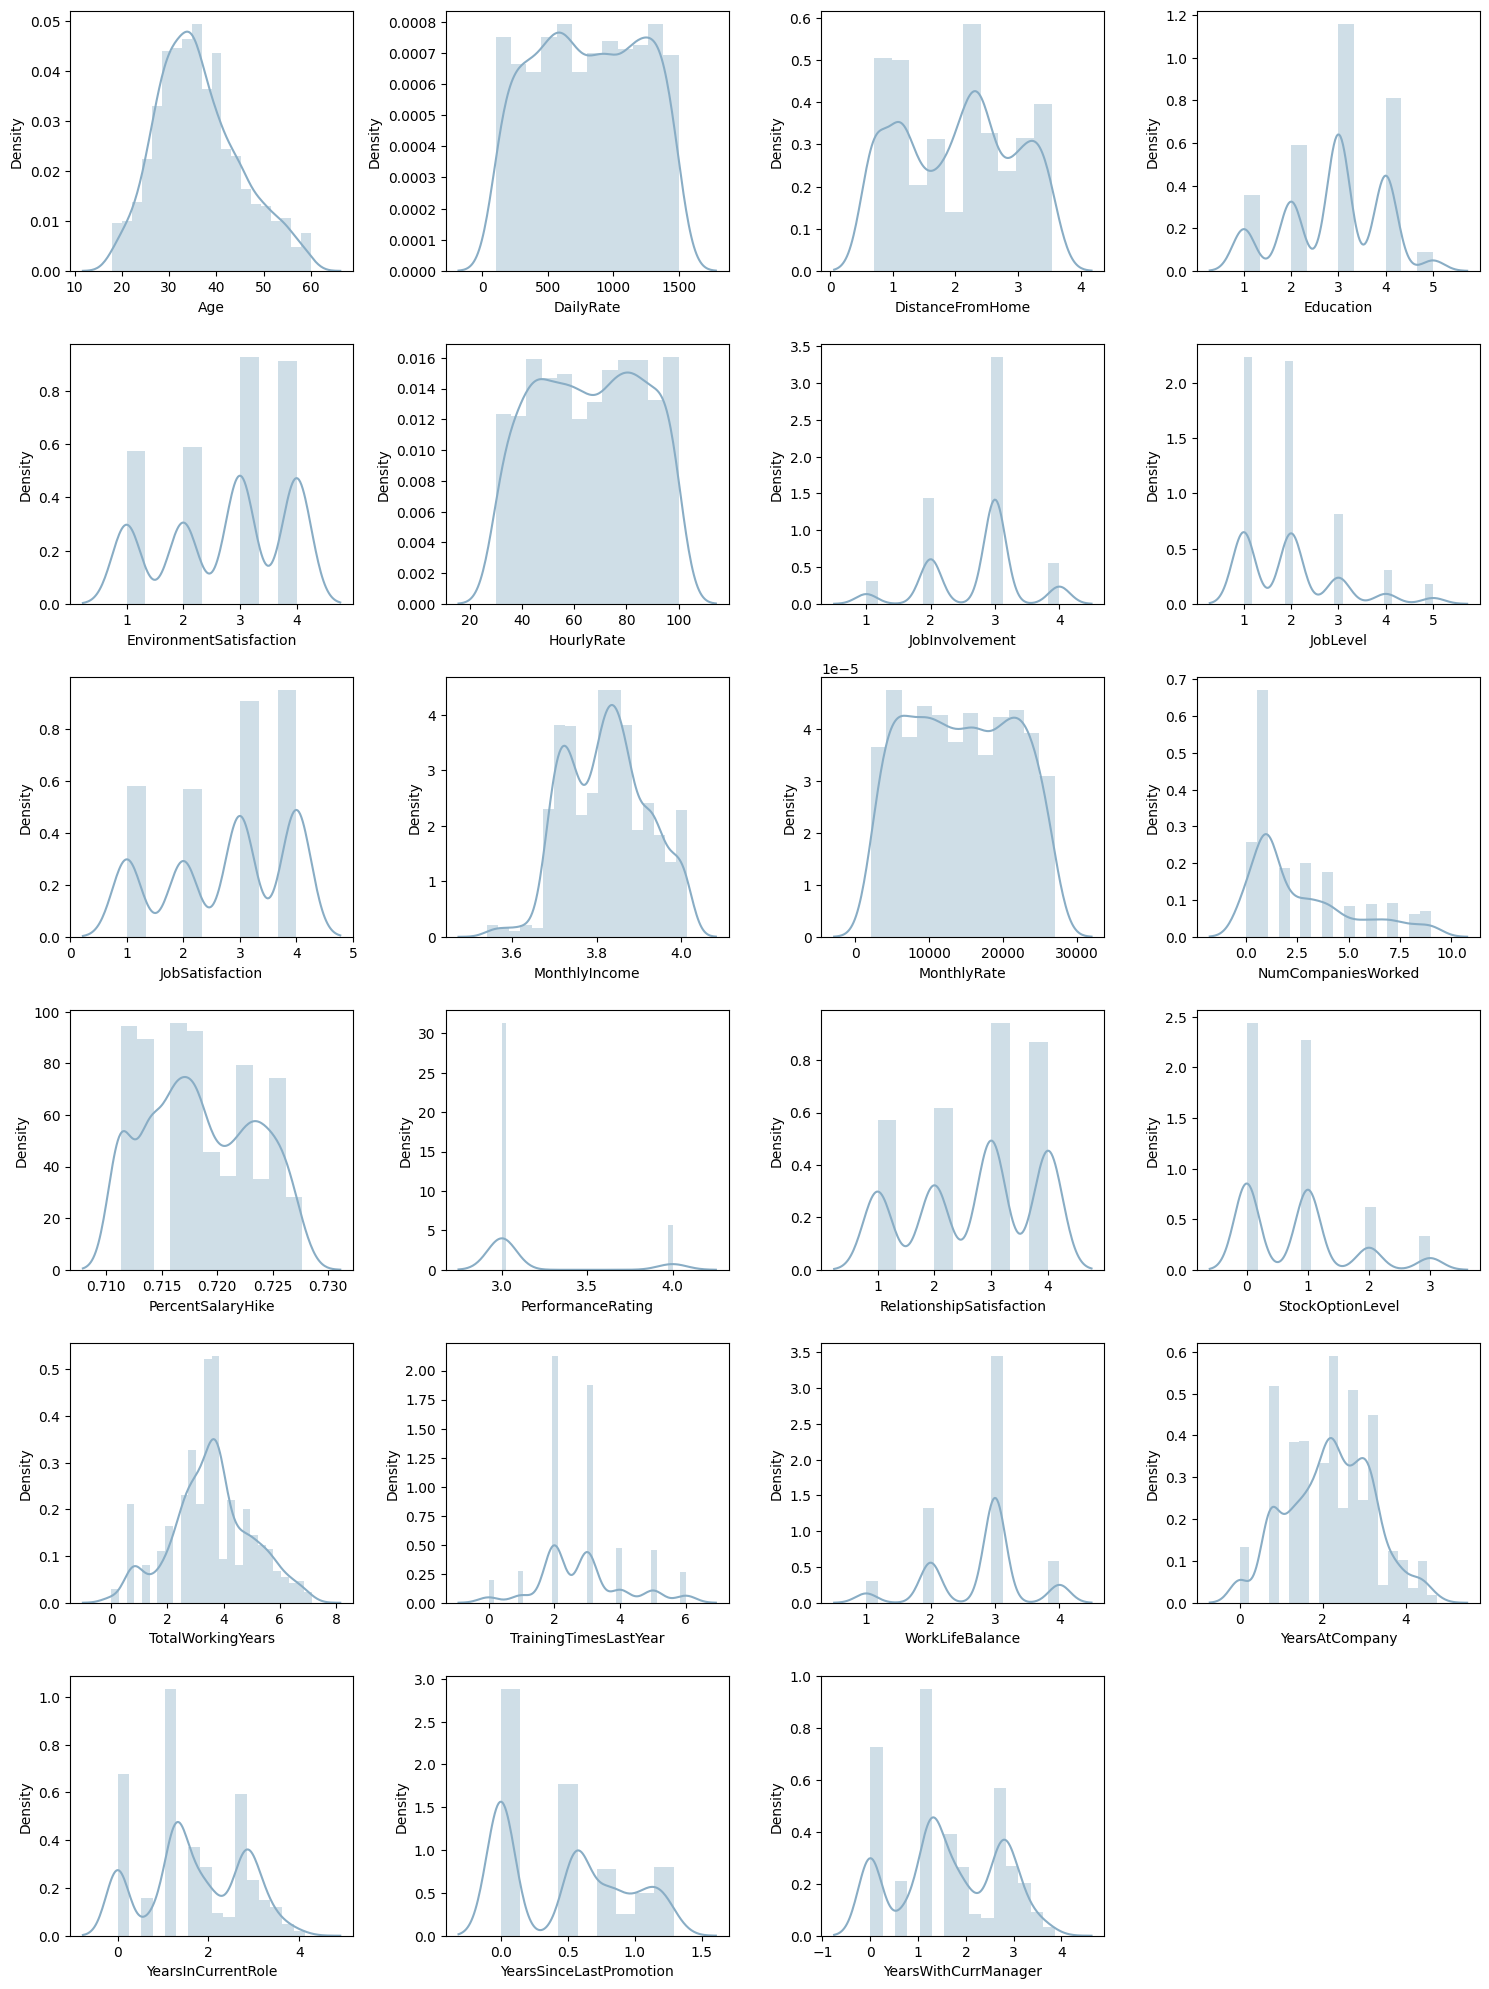

In [122]:
# Data distribution for numerical columns
plt.figure(figsize=(15, 20))
plot_num = 1
for col in num_cols:
    if plot_num <= 23:
        ax = plt.subplot(6, 4, plot_num)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The data distribution seems more normalised now.

### Encoding categorical variables

In [123]:
# Using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [124]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1, 1))

In [125]:
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2          0.698793   
1   49          0               1        279           1          2.254628   
2   37          1               2       1373           1          1.112840   
3   33          0               1       1392           1          1.409000   
4   27          0               2        591           1          1.112840   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           3.331995                      0                1        2.427596   
1           3.786692                      3                3        3.155981   
2           3.079851                      3                3        0.000000   
3           3.331995                      3                3        2.823661   
4           2.806491                      3                3        1.242409   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            2.018485                -0.000000              2.260281  
1            2.794574                 0.566648              2.727090  
2            0.000000                -0.000000              0.000000  
3            2.794574                 0.939888              0.000000  
4            1.280069                 0.803607              1.264277  

[5 rows x 31 columns]

For Attrition, 1 is Yes and 0 is No.

### Correlation analysis

In [126]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159366        0.022340   0.021946   
Attrition                -0.159366   1.000000       -0.001041  -0.057220   
BusinessTravel            0.022340  -0.001041        1.000000  -0.004606   
DailyRate                 0.021946  -0.057220       -0.004606   1.000000   
Department               -0.038242   0.063637       -0.003521  -0.005398   
DistanceFromHome         -0.028793   0.080979       -0.015034  -0.003967   
Education                 0.198502  -0.032703       -0.010560  -0.018442   
EducationField           -0.032676   0.023585        0.022576   0.040645   
EnvironmentSatisfaction   0.014098  -0.112393        0.001183   0.033123   
Gender                   -0.039430   0.036252       -0.025364  -0.005242   
HourlyRate                0.025465  -0.001532        0.025424   0.014279   
JobInvolvement            0.036424  -0.133957        0.028261   0.048004   
JobLevel                  0.453902  -0.171968        0.018996   0.022978   
JobRole                  -0.112957   0.064283        0.000213  -0.015437   
JobSatisfaction           0.011763  -0.114206       -0.032491   0.042698   
MaritalStatus            -0.104372   0.160960        0.018687  -0.074113   
MonthlyIncome             0.436543  -0.207280        0.028387   0.029530   
MonthlyRate               0.026954   0.014888       -0.010307  -0.029844   
NumCompaniesWorked        0.309209   0.050314        0.018764   0.032948   
OverTime                  0.034180   0.257237        0.022378   0.020294   
PercentSalaryHike         0.013248  -0.017523       -0.027934   0.028690   
PerformanceRating        -0.000617   0.010781       -0.018274   0.000574   
RelationshipSatisfaction  0.041744  -0.052344       -0.029660   0.004516   
StockOptionLevel          0.054506  -0.136676       -0.015159   0.048361   
TotalWorkingYears         0.634884  -0.220878        0.031888   0.043307   
TrainingTimesLastYear    -0.019008  -0.057285        0.010322   0.005861   
WorkLifeBalance          -0.016913  -0.062492       -0.014140  -0.044266   
YearsAtCompany            0.174149  -0.201954       -0.021107   0.005806   
YearsInCurrentRole        0.118454  -0.187047       -0.032472   0.020542   
YearsSinceLastPromotion   0.103938  -0.050986       -0.027478  -0.035403   
YearsWithCurrManager      0.114962  -0.186821       -0.033222   0.007098   

                          Department  DistanceFromHome  Education  \
Age                        -0.038242         -0.028793   0.198502   
Attrition                   0.063637          0.080979  -0.032703   
BusinessTravel             -0.003521         -0.015034  -0.010560   
DailyRate                  -0.005398         -0.003967  -0.018442   
Department                  1.000000          0.037660   0.012846   
DistanceFromHome            0.037660          1.000000   0.003595   
Education                   0.012846          0.003595   1.000000   
EducationField              0.013432          0.011891  -0.038017   
EnvironmentSatisfaction    -0.014540         -0.012075  -0.026223   
Gender                     -0.030618          0.010557  -0.019166   
HourlyRate                 -0.002412          0.014926   0.010848   
JobInvolvement             -0.024040          0.036805   0.041343   
JobLevel                    0.126809         -0.004225   0.083065   
JobRole                     0.678627          0.009353   0.015140   
JobSatisfaction             0.029521         -0.019334  -0.007219   
MaritalStatus               0.052086         -0.027275  -0.012726   
MonthlyIncome               0.154056          0.000545   0.111594   
MonthlyRate                 0.022741          0.048976  -0.018540   
NumCompaniesWorked         -0.044344         -0.023326   0.130812   
OverTime                    0.014908          0.036524  -0.017166   
PercentSalaryHike          -0.015322          0.034946  -0.002478   
PerformanceRating          -0.039364          0.013212  -0.023487   
Relationshi

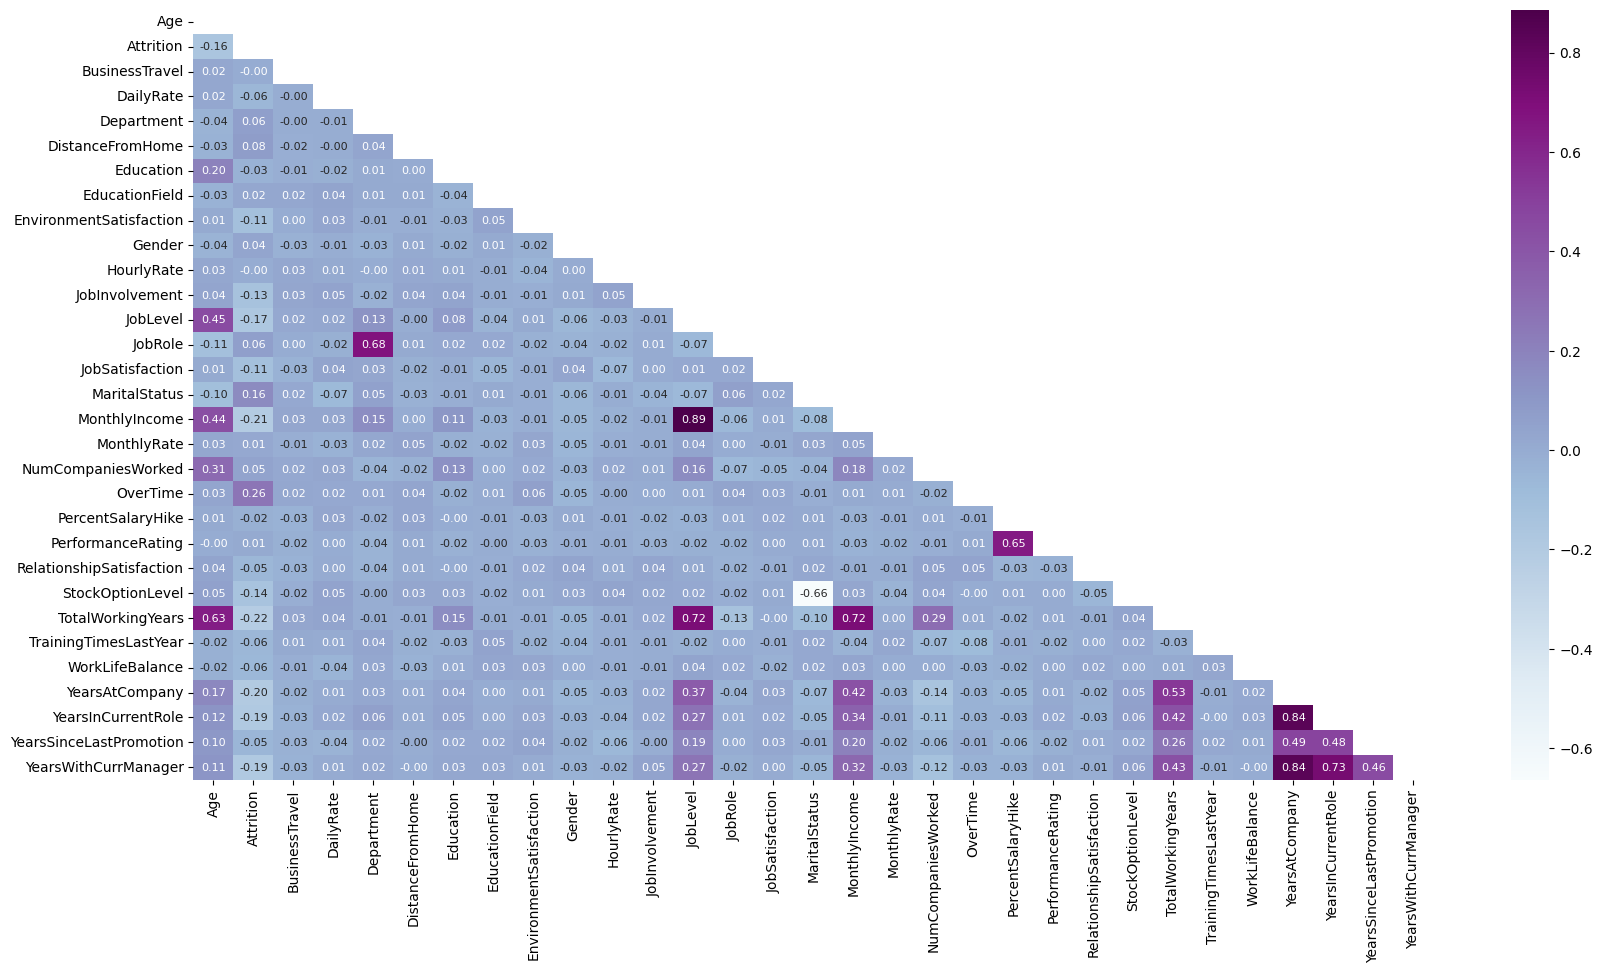

In [127]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='BuPu', mask=mask, annot_kws={"size": 8})
plt.show()

The strongest correlations are observed between the following:
- JobLevel and MonthlyIncome
- YearsAtCompany and YearsInCurrentRole
- YearsAtCompany and YearsWithCurrManager
- YearsInCurrentRole and YearsWithCurrManager
- JobLevel and TotalWorkingYears
- MonthlyIncome and TotalWorkingYears

Since there are several strong correlations, the data is likely to have multicollinearity issue. This will be handle when checking the VIF.

In [128]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.257237
MaritalStatus               0.160960
DistanceFromHome            0.080979
JobRole                     0.064283
Department                  0.063637
NumCompaniesWorked          0.050314
Gender                      0.036252
EducationField              0.023585
MonthlyRate                 0.014888
PerformanceRating           0.010781
BusinessTravel             -0.001041
HourlyRate                 -0.001532
PercentSalaryHike          -0.017523
Education                  -0.032703
YearsSinceLastPromotion    -0.050986
RelationshipSatisfaction   -0.052344
DailyRate                  -0.057220
TrainingTimesLastYear      -0.057285
WorkLifeBalance            -0.062492
EnvironmentSatisfaction    -0.112393
JobSatisfaction            -0.114206
JobInvolvement             -0.133957
StockOptionLevel           -0.136676
Age                        -0.159366
JobLevel                   -0.171968
YearsWithCurrManager       -0.186821
Y

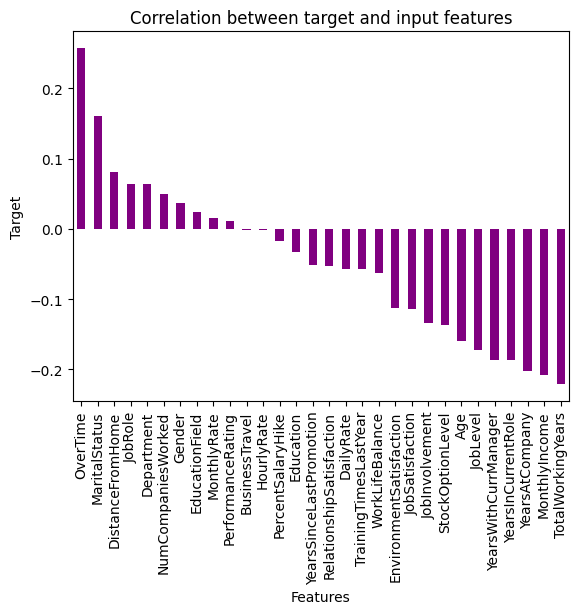

In [129]:
# Visualising the correlation between target and input features
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar', color='purple')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

Attrition has the highest correlation with OverTime and TotalWorkingYears.

### Separating features and target

In [130]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

#### Feature scaling

In [131]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.536681        0.593126   0.734325    1.405373         -1.489968   
1  1.442111       -0.905354  -1.307769   -0.496337          0.244561   
2  0.083966        0.593126   1.406752   -0.496337         -1.028366   
3 -0.368749       -0.905354   1.453896   -0.496337         -0.698191   
4 -1.047821        0.593126  -0.533609   -0.496337         -1.028366   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.876177       -0.940815                -0.665328 -1.229911    1.388670   
1  -1.853858       -0.940815                 0.251978  0.813067   -0.239091   
2  -0.876177        1.305159                 1.169285  0.813067    1.290017   
3   1.079185       -0.940815                 1.169285 -1.229911   -0.485721   
4  -1.853858        0.556501                -1.582635  0.813067   -1.274939   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...          -0.424765                 -1.575817         -0.929427   
1  ...           2.354241                  1.199034          0.238250   
2  ...          -0.424765                 -0.650866         -0.929427   
3  ...          -0.424765                  0.274084         -0.929427   
4  ...          -0.424765                  1.199034          0.238250   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.173231              -2.171420        -2.501172        0.231837   
1           0.147620               0.151871         0.336558        0.948319   
2          -0.351153               0.151871         0.336558       -2.156089   
3          -0.173231               0.151871         0.336558        0.621429   
4          -0.544046               0.151871         0.336558       -0.933983   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.290524                -1.073534              0.582177  
1            1.006575                 0.193168              1.018073  
2           -1.571814                -1.073534             -1.528426  
3            1.006575                 1.027520             -1.528426  
4           -0.390769                 0.722874             -0.347871  

[5 rows x 30 columns]

### Checking Variance Inflation Factor (VIF)

In [132]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0                        Age  1.869945
1             BusinessTravel  1.012981
2                  DailyRate  1.024830
3                 Department  2.050868
4           DistanceFromHome  1.015017
5                  Education  1.063282
6             EducationField  1.019443
7    EnvironmentSatisfaction  1.025085
8                     Gender  1.024665
9                 HourlyRate  1.021733
10            JobInvolvement  1.020980
11                  JobLevel  5.315287
12                   JobRole  1.984322
13           JobSatisfaction  1.023949
14             MaritalStatus  1.842908
15             MonthlyIncome  5.356354
16               MonthlyRate  1.020294
17        NumCompaniesWorked  1.328068
18                  OverTime  1.031204
19         PercentSalaryHike  1.757636
20         PerformanceRating  1.747286
21  RelationshipSatisfaction  1.023004
22          StockOptionLevel  1.818162
23         TotalWorkingYears  4.073349
24     TrainingTimesLastYear  1.027788
25           WorkLifeBalance  1.015726
26            YearsAtCompany  6.195706
27        YearsInCurrentRole  3.549663
28   YearsSinceLastPromotion  1.374763
29      YearsWithCurrManager  3.447653

Ideally, the VIF values should be below 5. Only YearsAtCompany is slightly out of range. We can remove the column and proceed with building the model.

In [133]:
x.drop(columns='YearsAtCompany', inplace=True)

In [134]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

Features       VIF
0                        Age  1.862389
1             BusinessTravel  1.012922
2                  DailyRate  1.024155
3                 Department  2.050503
4           DistanceFromHome  1.014876
5                  Education  1.062969
6             EducationField  1.019134
7    EnvironmentSatisfaction  1.025072
8                     Gender  1.022613
9                 HourlyRate  1.021720
10            JobInvolvement  1.020658
11                  JobLevel  5.308507
12                   JobRole  1.983401
13           JobSatisfaction  1.021749
14             MaritalStatus  1.840671
15             MonthlyIncome  5.356298
16               MonthlyRate  1.018132
17        NumCompaniesWorked  1.270053
18                  OverTime  1.030701
19         PercentSalaryHike  1.751495
20         PerformanceRating  1.745821
21  RelationshipSatisfaction  1.022989
22          StockOptionLevel  1.817024
23         TotalWorkingYears  3.838455
24     TrainingTimesLastYear  1.027698
25           WorkLifeBalance  1.015668
26        YearsInCurrentRole  2.451185
27   YearsSinceLastPromotion  1.367511
28      YearsWithCurrManager  2.402670

Now all values are within or close to range.

### Model building

In [135]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Splitting data into train and test

In [136]:
# Finding the best random state for splitting the data into training and validation sets.
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.9016786570743405
Random state for best accuracy: 71


In [137]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Handling Class imbalance

In [138]:
y_train.value_counts()

0    810
1    160
Name: Attrition, dtype: int64

There is an imbalance in the training data, which can affect the accuracy of the clasification model. This issue can be resolved by oversampling (creating new data for the class with less number of values).<br>

Oversampling is done after splitting the data so that we don't create any new data for testing the model.

#### Oversampling using SMOTE

In [139]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [140]:
y1.value_counts()

0    810
1    810
Name: Attrition, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification Models

In [141]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [142]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

Model  Accuracy
5                Extra Trees  0.887290
9                   CatBoost  0.884892
4              Random Forest  0.877698
7          Gradient Boosting  0.877698
8                    XGBoost  0.870504
1  Support Vector Classifier  0.851319
6                   AdaBoost  0.848921
0        Logistic Regression  0.798561
3              Decision Tree  0.767386
2                        KNN  0.659472

We can observe that RandomForest and CatBoost model performs the best with 88.49% accuracy.

#### Confusion matrices

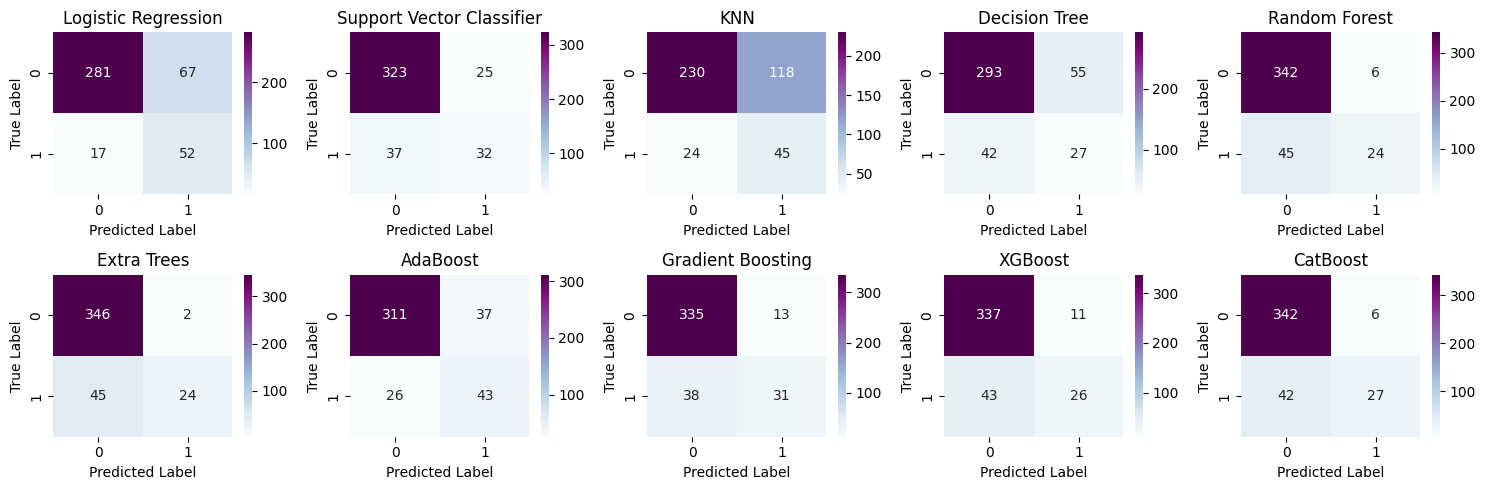

In [143]:
plt.figure(figsize=(15, 5))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(2, 5, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [144]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       348
           1       0.44      0.75      0.55        69

    accuracy                           0.80       417
   macro avg       0.69      0.78      0.71       417
weighted avg       0.86      0.80      0.82       417

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       348
           1       0.56      0.46      0.51        69

    accuracy                           0.85       417
   macro avg       0.73      0.70      0.71       417
weighted avg       0.84      0.85      0.85       417

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.91      0.66      0.76       348
           1       0.28      0.65      0.39        69

    accura

For RandomForest and CatBoost models, both precision and recall values are also high along with the accuracy.

#### Using Cross Validation

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x1, y1, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

Model  CV Accuracy  Accuracy  Difference
9                   CatBoost     0.887654  0.884892    0.002762
0        Logistic Regression     0.805556  0.798561    0.006994
7          Gradient Boosting     0.889506  0.877698    0.011808
8                    XGBoost     0.897531  0.870504    0.027027
6                   AdaBoost     0.879012  0.848921    0.030091
4              Random Forest     0.927160  0.884892    0.042268
3              Decision Tree     0.832716  0.776978    0.055738
1  Support Vector Classifier     0.923457  0.851319    0.072138
5                Extra Trees     0.967901  0.870504    0.097398
2                        KNN     0.814198  0.659472    0.154725

The least overfitting model is CatBoost Classifier. The difference between cross-validation accuracy and test accuracy is the least for this model.

The CatBoost model has the highest Test Accuracy as well as Cross Validation Accuracy. So, we will now tune this model.

#### Hyperparameter Tuning

In [147]:
from sklearn.model_selection import GridSearchCV

##### CatBoost Model

In [148]:
params = {
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }

In [149]:
gcv = GridSearchCV(catboost.CatBoostClassifier(verbose=0), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001C09C38F760>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [150]:
best_params = gcv.best_params_
best_params

{'depth': 10, 'iterations': 80, 'learning_rate': 0.1}

In [151]:
model_cb = catboost.CatBoostClassifier(verbose=0, **best_params)
model_cb.fit(x1, y1)
y_pred_cb = model_cb.predict(x_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(accuracy_cb)

0.8776978417266187


The Accuracy is 87.77%

#### Plotting ROC Curve

In [152]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

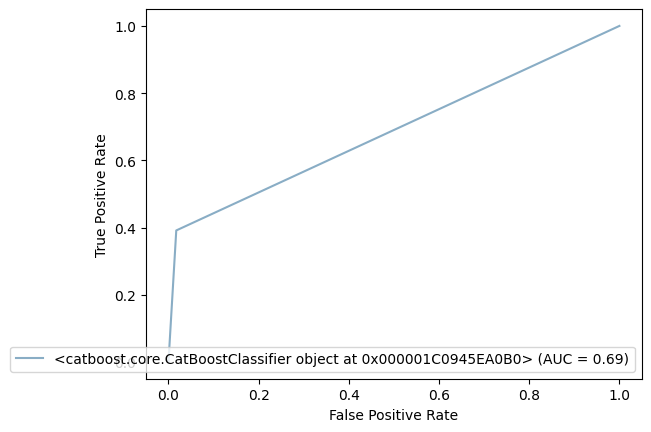

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_cb)
display.plot()

The AUC score of the model is 0.69

### Saving the model

In [154]:
import pickle

In [155]:
filename = 'attrition_model.pkl'
pickle.dump(model_cb, open(filename, 'wb'))

#### Predicting using the saved model

In [156]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [157]:
df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
df

Actual  Predicted
0         0          0
1         0          0
2         1          1
3         0          0
4         1          1
..      ...        ...
412       1          0
413       0          0
414       0          0
415       0          0
416       0          0

[417 rows x 2 columns]